In [1]:
######################################################################
# Modelling Sleep Duration Using Gaussian Processes
# LE49: MiniProject
# Jan Ondras (jo356), Trinity College
# 2017/2018
######################################################################
#############################################################################################
# Extract (x,y) time series data for various datatypes (sleepduration, bed in, bed out times, step count)
# for each user
#############################################################################################

import numpy as np
import time

# Load all data
st = time.time()
user_info = np.loadtxt('./../Dataset/userinfo.csv', delimiter=",", skiprows=1, dtype=str) # User info
print "Loading time: ", time.time()-st
user_data = np.loadtxt('./../Dataset/data.csv', delimiter=",", dtype=str) # User data
print "Loading time: ", time.time()-st

Loading time:  0.0610160827637
Loading time:  475.754209995


In [24]:
#############################################################################################
# Data analysis, weekly stats for various datatypes
#############################################################################################

t = 'steps'

types = {
    'sleepduration': '10',
    'bedin': '11',
    'bedout': '12',
    'steps': '1',
    'weight': '2',
    'bloodpressure': '4',
    'heartrate': '7'
}

from datetime import datetime, timedelta
import matplotlib.pyplot as plt

date_shift = int(datetime.strptime('2016-03-31', '%Y-%m-%d').strftime('%j'))
weekdays = ['Mo', 'Tu', 'We', 'Th', 'Fr', 'Sa', 'Su'] # 0-6
monthdays = range(1, 32) # days 1-31
yeardays = range(0, 366) # days shifted 0-365 = 31/3/2016-2017

bins_week = np.zeros(7)
bins_month = np.zeros(31)
bins_year = np.zeros(366)

y_mean_week = np.zeros(7)
y_mean_month = np.zeros(31)
y_mean_year = np.zeros(366)

xy_week = []
xy_month = []
xy_year = []

for row in user_data:
    if row[3] == types[t]:
        
        #date = row[2] # date as string
        #m = row[4] # measure as string
        
        dt = datetime.strptime(row[2], '%Y-%m-%d') 
        wd = dt.weekday()                                # gives weekday 0-6 = Mo-Su by weekdays
        md = int(dt.strftime('%d')) - 1                  # Day of the month as a zero-padded decimal number, 1-31
        yd = (int(dt.strftime('%j')) - date_shift) % 366 # year day 
        
        bins_week[wd] += 1. 
        bins_month[md] += 1.
        bins_year[yd] += 1.
        
        xy_week.append( [wd, float(row[4])] )
        xy_month.append([md, float(row[4])] )
        xy_year.append( [yd, float(row[4])] )
        
        y_mean_week[wd] += float(row[4])
        y_mean_month[md]  += float(row[4])
        y_mean_year[yd] += float(row[4])
        
y_mean_week = y_mean_week / bins_week  
y_mean_month = y_mean_month / bins_month   
y_mean_year = y_mean_year / bins_year   
        
xy_week = np.reshape(xy_week, (-1,2))
xy_month = np.reshape(xy_month, (-1,2))
xy_year = np.reshape(xy_year, (-1,2))



/home/janciovec/.local/lib/python2.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in divide


Type:  steps
# measurements per each day in week, month, year


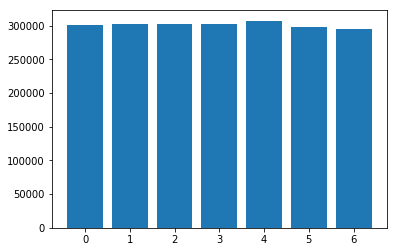

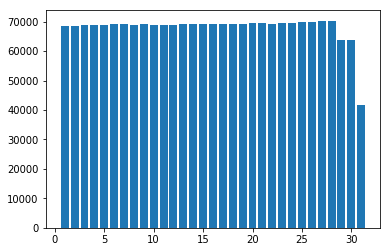

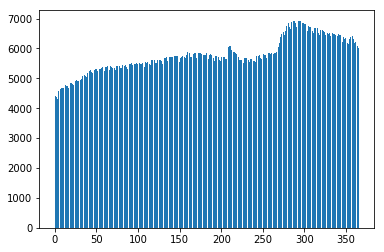

# measurements per each day in week, month, year


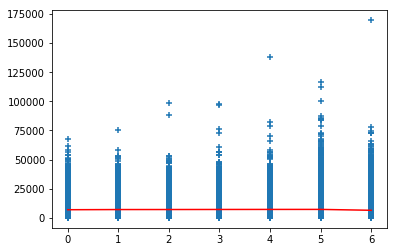

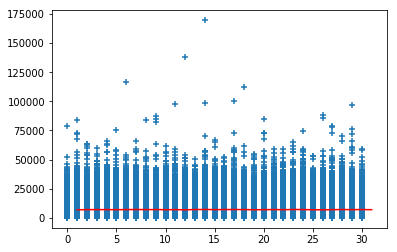

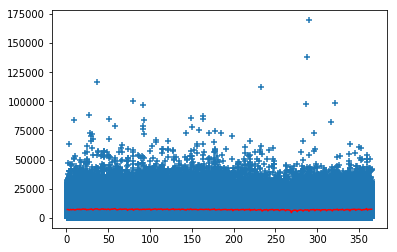

In [25]:
print "Type: ", t
print "# measurements per each day in week, month, year"
plt.figure()
plt.bar(range(0, 7), bins_week)
plt.show()
plt.figure()
plt.bar(monthdays, bins_month)
plt.show()
plt.figure()
plt.bar(yeardays, bins_year)
plt.show()

print "# measurements per each day in week, month, year"
plt.figure()
plt.scatter(xy_week[:,0], xy_week[:,1], marker='+')
plt.plot(np.arange(7), y_mean_week, color='red')
plt.show()
plt.figure()
plt.scatter(xy_month[:,0], xy_month[:,1], marker='+')
plt.plot(monthdays, y_mean_month, color='red')
plt.show()
plt.figure()
plt.scatter(xy_year[:,0], xy_year[:,1], marker='+')
plt.plot(yeardays, y_mean_year, color='red')
plt.show()

Type:  bedout
# measurements per each day in week, month, year


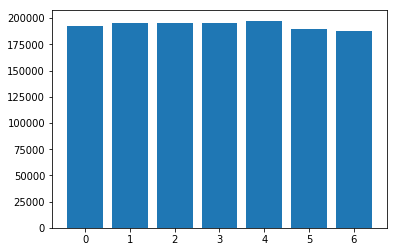

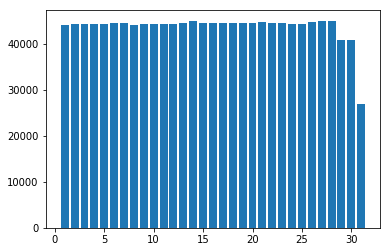

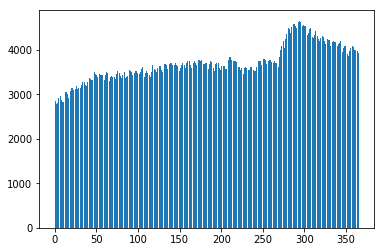

# measurements per each day in week, month, year


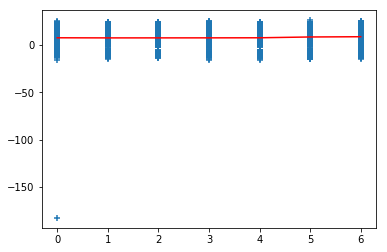

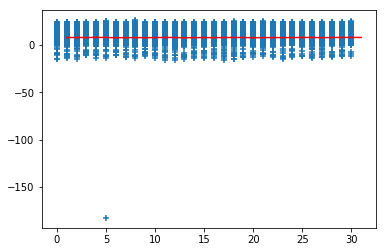

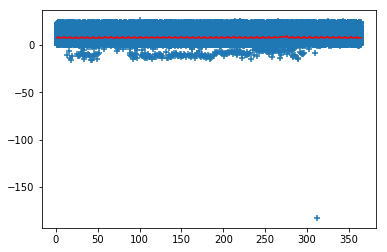

In [23]:
print "Type: ", t
print "# measurements per each day in week, month, year"
plt.figure()
plt.bar(range(0, 7), bins_week)
plt.show()
plt.figure()
plt.bar(monthdays, bins_month)
plt.show()
plt.figure()
plt.bar(yeardays, bins_year)
plt.show()

print "# measurements per each day in week, month, year"
plt.figure()
plt.scatter(xy_week[:,0], xy_week[:,1], marker='+')
plt.plot(np.arange(7), y_mean_week, color='red')
plt.show()
plt.figure()
plt.scatter(xy_month[:,0], xy_month[:,1], marker='+')
plt.plot(monthdays, y_mean_month, color='red')
plt.show()
plt.figure()
plt.scatter(xy_year[:,0], xy_year[:,1], marker='+')
plt.plot(yeardays, y_mean_year, color='red')
plt.show()

Type:  bedin
# measurements per each day in week, month, year


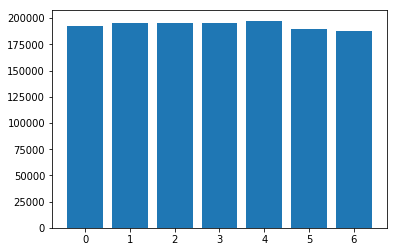

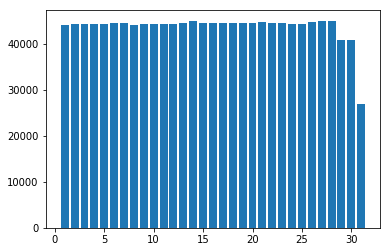

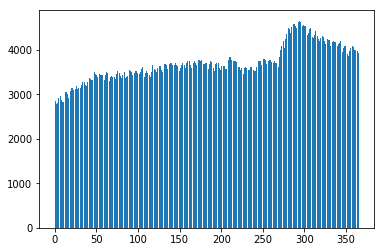

# measurements per each day in week, month, year


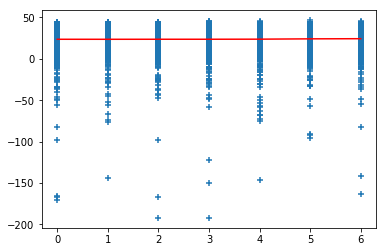

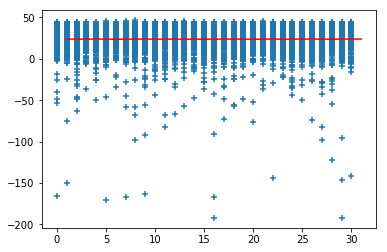

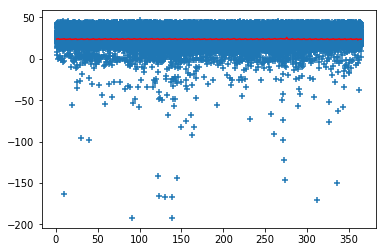

In [21]:
print "Type: ", t
print "# measurements per each day in week, month, year"
plt.figure()
plt.bar(range(0, 7), bins_week)
plt.show()
plt.figure()
plt.bar(monthdays, bins_month)
plt.show()
plt.figure()
plt.bar(yeardays, bins_year)
plt.show()

print "# measurements per each day in week, month, year"
plt.figure()
plt.scatter(xy_week[:,0], xy_week[:,1], marker='+')
plt.plot(np.arange(7), y_mean_week, color='red')
plt.show()
plt.figure()
plt.scatter(xy_month[:,0], xy_month[:,1], marker='+')
plt.plot(monthdays, y_mean_month, color='red')
plt.show()
plt.figure()
plt.scatter(xy_year[:,0], xy_year[:,1], marker='+')
plt.plot(yeardays, y_mean_year, color='red')
plt.show()

Type:  sleepduration
# measurements per each day in week, month, year


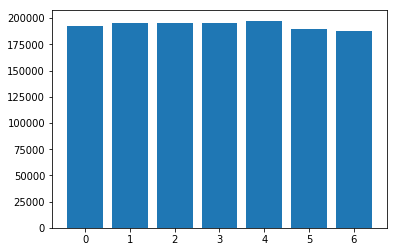

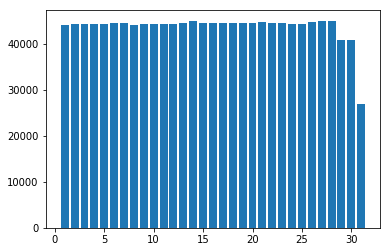

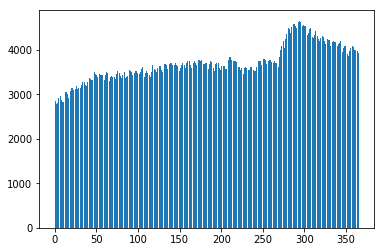

# measurements per each day in week, month, year


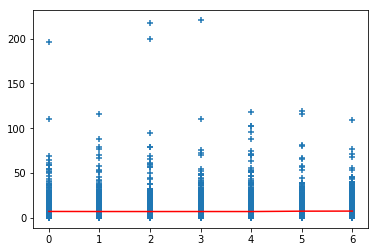

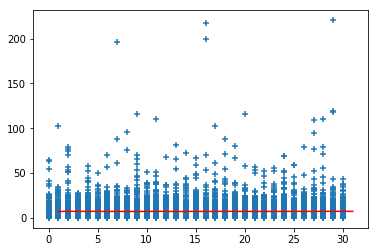

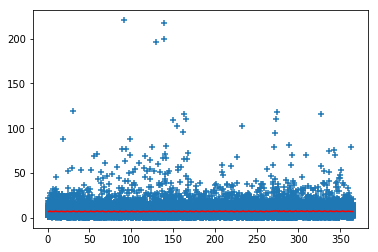

In [18]:
print "Type: ", t
print "# measurements per each day in week, month, year"
plt.figure()
plt.bar(range(0, 7), bins_week)
plt.show()
plt.figure()
plt.bar(monthdays, bins_month)
plt.show()
plt.figure()
plt.bar(yeardays, bins_year)
plt.show()

print "# measurements per each day in week, month, year"
plt.figure()
plt.scatter(xy_week[:,0], xy_week[:,1], marker='+')
plt.plot(np.arange(7), y_mean_week, color='red')
plt.show()
plt.figure()
plt.scatter(xy_month[:,0], xy_month[:,1], marker='+')
plt.plot(monthdays, y_mean_month, color='red')
plt.show()
plt.figure()
plt.scatter(xy_year[:,0], xy_year[:,1], marker='+')
plt.plot(yeardays, y_mean_year, color='red')
plt.show()

In [19]:
print y_mean_week

[ 7.19975901  7.11943067  7.09817538  7.11332945  7.09312241  7.50885142
  7.59592065]


In [40]:
#############################################################################################
# STATS
#############################################################################################
# Get min and max times/dates for all data and for each type
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

date_shift = int(datetime.strptime('2016-03-31', '%Y-%m-%d').strftime('%j'))
# substracted from every date (modulo 366) => (x-91) % 366
# 0   = 2016-03-31, 
# 1   = 2016-04-01, 
# 276 = 2017-01-01, 
# 365 = 2017-03-31

# us = sorted(user_data[:, 2])
dmin = '2019-05-22'
dmax = '2013-07-07'
for x in user_data[:, 2]:
    if x > dmax:
        dmax = x
    if x < dmin:
        dmin = x

print "Overall min and max dates: ", dmin, dmax 

types = {
    'sleepduration': '10',
    'bedin': '11',
    'bedout': '12',
    'steps': '1',
    'weight': '2',
    'bloodpressure': '4',
    'heartrate': '7'
}
bins = {}
for k, v in types.items():
    bins[k] = np.zeros(366)
    dmin = '2019-05-22'
    dmax = '2013-07-07'
    
    for u in user_data:
        if  u[3] == v: # type agrees
            if u[2] > dmax:
                dmax = u[2]
            if u[2] < dmin:
                dmin = u[2]

            bins[k][(int(datetime.strptime(u[2], '%Y-%m-%d').strftime('%j')) -date_shift) % 366] += 1
            # bins[k][int(datetime.strptime(u[2], '%Y-%m-%d').strftime('%j')) - 1] += 1
            
    print "\t", dmin, dmax, "For", k
#############################################################################################

Overall min and max dates:  2016-03-31 2017-03-31
	2016-04-01 2017-03-31 For bedin
	2016-04-01 2017-03-31 For heartrate
	2016-03-31 2017-03-31 For bloodpressure
	2016-04-01 2017-03-31 For weight
	2016-04-01 2017-03-31 For sleepduration
	2016-04-01 2017-03-31 For steps
	2016-04-01 2017-03-31 For bedout


RESULTS

Overall min and max dates:  2016-03-31 2017-03-31
	2016-04-01 2017-03-31 For bedin
	2016-04-01 2017-03-31 For heartrate
	2016-03-31 2017-03-31 For bloodpressure
	2016-04-01 2017-03-31 For weight
	2016-04-01 2017-03-31 For sleepduration
	2016-04-01 2017-03-31 For steps
	2016-04-01 2017-03-31 For bedout
    
Mean # measurements per day | Measurement type
3697.43442623 	bedin
1099.63387978 	heartrate
196.519125683 	bloodpressure
1217.73497268 	weight
3697.43442623 	sleepduration
5760.71038251 	steps
3697.43442623 	bedout

Mean # measurements per day | Measurement type
3697.43442623 	bedin
1099.63387978 	heartrate
196.519125683 	bloodpressure
1217.73497268 	weight
3697.43442623 	sleepduration
5760.71038251 	steps
3697.43442623 	bedout


<IPython.core.display.Javascript object>


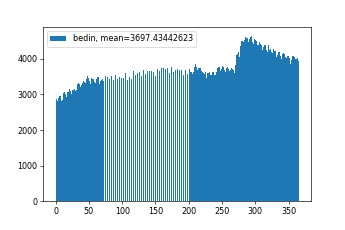

<IPython.core.display.Javascript object>


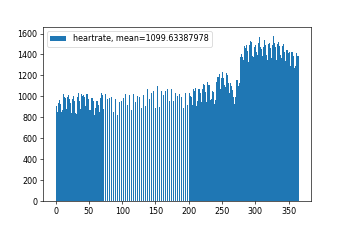

<IPython.core.display.Javascript object>


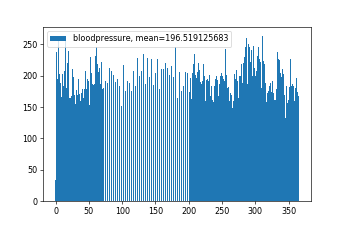

<IPython.core.display.Javascript object>


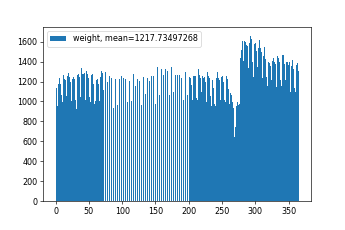

<IPython.core.display.Javascript object>


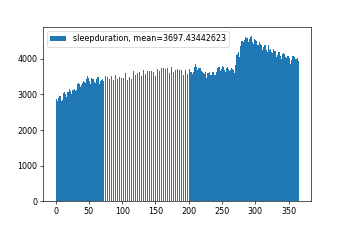

<IPython.core.display.Javascript object>


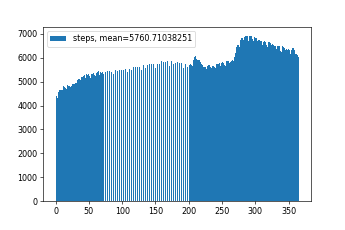

<IPython.core.display.Javascript object>


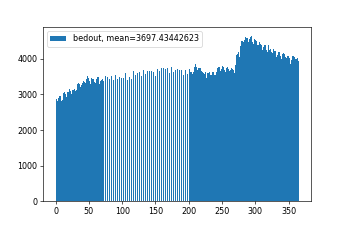

In [59]:
%matplotlib notebook
# plt.figure()
print "Mean # measurements per day | Measurement type"
for k in types.keys():
    print np.mean(bins[k]), "\t", k
for k in types.keys():
    plt.figure()
    plt.bar(np.arange(len(bins[k])), bins[k], label=k + ', mean=' + str(np.mean(bins[k])))
    plt.legend()
plt.show()

In [3]:
from datetime import datetime, timedelta
import time
#############################################################################################
# For chosen type extract time-series for each user, save them
# Do data cleaning! 
# For sleepduration - remove measurements with sleepduration > 20 hours
#############################################################################################

t = 'sleepduration' # type of data to extract

types = {
    'sleepduration': '10',
    'bedin': '11',
    'bedout': '12',
    'steps': '1',
    'weight': '2',
    'bloodpressure': '4',
    'heartrate': '7'
}

date_shift = int(datetime.strptime('2016-03-31', '%Y-%m-%d').strftime('%j'))

def convert_date(ds): # take string date and convert to day, shifted 0-365 = 31/3/2016-2017
    return (int(datetime.strptime(ds, '%Y-%m-%d').strftime('%j')) - date_shift) % 366

d = {} # to temporarily store data for each user
cnt = 0
st = time.time()
for row in user_data:
    UID = row[1]
    
    if row[3] == types[t]: # type agrees
        if UID not in d:
            d[UID] = [] # this will be 2D array [[x1,y1], [x2,y2], ...]
        # Data cleaning - skip measurements of more than 20 hours of sleep
        if float(row[4]) <= 20.:
            cnt += 1
            d[UID].append([ convert_date(row[2]), float(row[4]) ]) # [x,y]
        
print "Time taken: ", time.time()-st
print "#measurements of type " + t + ": ", cnt

Time taken:  109.512545824
#measurements of type sleepduration:  1352658


In [4]:
st = time.time()
cnt = 0
N_datapoints_per_user = []
for UID in d.keys():
    if d[UID] != []: # at least one datapoint for this user and the type of interest
        np.savez('./../Dataset/clean_' + t + '/' + UID + '.npz', xy=np.array(d[UID]) )
#         np.savez('./../Dataset/' + t + '/' + UID + '.npz', xy=np.array(d[UID]) )
        cnt += 1
        print UID,":\t",len(d[UID]) # num of datapoints for this user
        N_datapoints_per_user.append(len(d[UID]))
    else:
        print "err"
print "Time taken: ", time.time()-st 
print "#users who have type " + t + ": ", cnt

8971ac51e1b85609f01453fd406e842602f7cba7 :	63
5380dbe14a7ebac3702ad4eff8b6749180543935 :	279
3efcff22369a9985d8ce4060b784482cef52e747 :	88
4b314a12cc8deab1e7f12f443c518519229dc7b2 :	2
df397b753c95da72dfd12563710b8ca056601f02 :	210
f27b570aea69aa3f129ad6a2795d5ef89a427b34 :	240
74a8901d7ab3a95e37dc4fd39ae5e2e4011a9330 :	294
347145b405e92edbf6d2362bbca5b4bd82d83c24 :	337
9e08ff716871a0870f5e307bcef8a3d2cbbb8886 :	7
a55a5d97fede060aa137f853e562e512c5a92ddc :	331
3402141206397674c9bbe5091c7993c713a2fe03 :	38
785280cb5e15718b6ef6d0678e52f2c6ba77f50c :	141
29cb5e54a90303b4c4c27cfbbbb38b9ea7a15050 :	290
6a9f2f4e4f921583b5da6615cdc4f1b87c5958a3 :	161
af4c921c17c765c553ae9bb60d29e169f5144be7 :	282
64b12c7738c53d5e92a015c03acbdd71ec0e6a4a :	128
8816656164cba3a94467c2942ee1b97aa384b06e :	9
7934eb6a529914eac8073536bc79e9fa3b44f6bc :	76
4516ea7491e4d0d7d0cd7d534442e93591b41ed8 :	171
e66dc59cf3231a46ce4f83d6dc0ce347972ca21d :	43
2df8a29cab36d073726fcb17a9940afcc56a3a68 :	289
c72ab5cb0faafd5fdf396cf6

7ab090fbf8bb4de9beda86f40fc8f0ef7f3a0fa3 :	67
5db1e6a61b34e045a1af1d21b889fa8ef04fc93f :	115
0e5883e80515b76942c5a0a296881ab75995b007 :	40
31517193c21001b01753986c7aae15301244f74e :	147
ea116b8a5a3a2c5be35d41edc714026ad65569f8 :	151
593dfd46be789400c856ae603bd853f0ca89a06c :	167
88b74cc8fae8dd6802436a7b8d8a2fd082f4f3ec :	80
7e85e2de5c7f6f8f076f0909e996f16cbf5fc3da :	198
6f43b0eedf6d7e256fb234a8dec7eacf310d4bcf :	2
62cea9432f2aa4faec10ccecf25b2dcc84dcb8f1 :	31
9cb78352e0c5e0182e1a016517f9a222fdb44666 :	53
4e69ff663d997ec3101b6c36db3fa86bd1027043 :	84
1e390b05e2e0eb1eb78ed071da11627328b15929 :	340
8c430cd7baa36d0b0df4a40270e0f41c9c7977f6 :	74
298ca1cc75278d0b636d4ae8e1ddb926064813ab :	4
0d835ef83130a2d7c882efca7d83343535f467d4 :	17
dce869f76893f1d419669d49a22af061379c459e :	93
6aa60c8ffa5f8091763eb0eded070fd73f0f7c10 :	1
3ec050f5f204402482722bf4bd26cdd0a019ff4c :	334
afdff26e5c9b7f46cf7467ac05a6eec37a1bd90e :	95
04c6454d766ca4d726e082ec5cbbdda666c06af9 :	24
cead1c2a9b7c62b923ae61f6b233c5

4934c6e46cf0b5e20ca6404597dfb56bdcf83756 :	351
cc5705bfc8347aade94f6ff522fe105f9ff846a2 :	95
ba1d44b4f94506256225238dc0491d3f5477fb1e :	315
07a090dc0d725669f180fed41c0405eb171c60e9 :	8
391918549fccad15d3ef934b1bddb19f1a1d396f :	45
969c922b23475ddf347e7883b6ccfdfecebf0bc5 :	262
f7a2a99157c711fb873f28d19e3e462c8365b132 :	6
b8717d4beefedafa42033bb23f3031f2da136241 :	22
45f0567368e4038b62848a311b65ef517e8fa140 :	61
1566fecfb92c56b87c5896e95529626d4e211e85 :	228
5bf788c37b0084399e79605c86cf1950bc0eab2f :	180
7fa5d9c21b46f2975f6932ad5abdf17e94c86fff :	26
68d27e7b0bffe70cf621ffc99a1bc4cfbefd45e7 :	254
44961908d532895f045d0a0541ec0ddc696b3a28 :	243
f12fccf40b0b3a0e753bb214941072d54e5903a4 :	314
737bc3234b749615d24b3475530e65f63b358c89 :	244
0a158952795a6a04feaabf28add14606dada5add :	72
fecc0d67ae16fcd39b929fea908dd439dab562bb :	202
301244e1f732f90413a67b01d76ad042a7c2122f :	246
1168a109cab4fbd48b4281096293e0c4dc04c501 :	3
e1c35ce0a8881dcd49ff6abad4803051104bc4ac :	114
b8af6361ee2caff6781b58922

23f88ee17963b26843a557e47e79defe1aeea0c4 :	189
ae06d169e57487e837e27add9c0d1ffabb891d3b :	17
c06bc0ab05f05288b0db4c98befc25fcd575b79b :	318
ce02b55069a1f05b49959786fbb29481a1724eb6 :	50
b3bd732308df24a0602411a32f62b7a0d18a2abb :	41
a1cb5349bfd79711c7770ab4777b2e09d0be44ae :	308
8116263711718532e73d4c73a4dbe73eb34b53d4 :	19
fb61e19f77f8b29a44e518f7eeb30de8447e23d5 :	249
c65c08682bfcf88d40b88238b3716095f97856b5 :	340
ef807f1db6c77dd2e10a0cc3f4dcee3f5cf97368 :	257
73bded5b052cca8fb226f65cc1d851016dbcc74a :	96
3b15fb5d5b8f5b58d0ce5e05004161e8eefb36b4 :	35
589640be355a3f9829503dd051e7d00baaa7b1a7 :	215
ba65e7865ad8c6af7f353102cabba143577409aa :	34
9cf37888d8be0b0dd6aaebefcd335159573b57e0 :	27
ea7d516d1da9ddb77baa4f93e380d33ebb0fa5d7 :	13
df9851c9d493bcd94642b8102a195acd3f163bc6 :	4
7ce593f4de52c8d7393b59578a2f7175e9f57274 :	258
9e1191fffd48d00f81c9bddbc163a691cdc08846 :	44
087b497062a9348d49f26719d71f61b0c6dc99ad :	119
ca12e94fd0d540e119f23be0a1a079e73f563298 :	18
d34acaa280093f1d31d7a7226c

a9fa70212833c1243f6355145003cd0474f65234 :	19
62363c6068656e77b555a45feee711625717e5fc :	62
454768ad4f42a5a82fff02d8705fc28a591fef17 :	95
f1467b6167b544351065e898f4366a0e4fca7c2e :	321
49b24997ced42be6e3a7cac48645e64a2ba7a596 :	58
2765869cdbd31d08f447e33796d30a363be12313 :	99
0b628dc92f314735a1147c2f93b82989a05a9aeb :	53
2477eec3f66b9079bd4afb82787301bfaf30fa5f :	22
44bd6b5eac55bea4a99c23cf1a5c815f03d10109 :	69
60e6dde19ccbfda4541919873d59304085ee134e :	356
f70d291b21dc6a0d7e828de5f441afa669b8cfd0 :	52
b286020e0fc5b5076727d33626a598d3f11dd943 :	72
bc0f4102b28758d9380e994db735aaf40cdf37c0 :	66
d8188c70610e9f6561d353062ffb4f4749eb19e3 :	232
4563ddd7f59fd1fbf8e48dce4db6a4ae3e335c50 :	35
623d3a7e352d263cfe0bf585e594fbd89be0a546 :	2
4774af2c115e400c4db5d1c5099ee6663e4df7b8 :	59
9295d8058ec52579276341e7b3582f8a3b58cb01 :	96
27be8715df7241d5029ce1c84e2c950fa64857c6 :	261
8a6ca17a5ec0b56663f815be0c29ba647ae784b9 :	20
5d25a525b0c8687c35f633c05a72b4cc17584835 :	21
eba774ded39286ce404d44da0a2d223

f5ceb50db8ab10d4557f9d3a2ee7010082c78240 :	148
a89dd000e0c6c2e02244063bd0b23190e6518e80 :	195
7fce9b5581edaee70bc07e040d41cf91f066462a :	106
e99f791ff1fbed14d95bce2af5ddcd2c1eaaec53 :	11
028908adb9f6a43bc2aea353607e161300c297a3 :	59
b7e94b959b95533a22421974c4cda9200369d903 :	12
ce07e20c61fad29f4b2c08e86d270dc322d88bfb :	3
1b345f6befc37533afe12071f15c22e76eb5b2b5 :	48
25da46f9ff243d9fc82d86c778d49a3df26c4b5b :	94
758ac87211585ff56c44c710b4fe5276b38f0825 :	329
98dc8b22a2ef50d862e9e402fb855fb190d249c8 :	1
30a943e7031c7a4927e122d92aa625127fb70094 :	72
91249a4d1fbe43701cd4bcc4965ccfab5ac6d9f4 :	52
1501fb126f103279a4b4a6f76ad473edcf0de889 :	357
8e13a5bc6cb9075cf220dfa237f5b01a22e43906 :	345
7e634531faddc6955e9e746200e68d445601a25f :	164
c59c65ef49edccab2a6bc9a3552603b203b20ef6 :	250
46c1b39f9fe4474f0deb42f93ce3cdd15dbae84e :	9
abee3adf6864cb8bc9fe91379ff18ecf75958cd0 :	208
15b8ed3a80d1b48b215cc5553d370bb6e4958c8d :	264
dc4d4014f05080982abb713bd3de6723cac08526 :	333
df480c4a01109cd229def7afa0

d934b1d4779474861497325dcc4686e8d0c469da :	50
516d638ed8397528374003a489f45678e0ce29bf :	145
7be0f8e12eeec6024c6391d601459c00d68eb612 :	285
1ad076bc6a92f3374df234ada4ed89b00fd27a97 :	307
8fb043a8fd48c4c4b906244714f7b1e661f6712f :	88
f1bb95a0266d2b1f5bb58d304c65bc68ceef5cd2 :	77
ff669d367ca28ab956ab0229ffaab032cd6616d2 :	111
9c7fdcf16a61e41c4813492fef58d1c4fa60a20e :	145
d94bd9554bae2673fe771b8d2f2f40e366ac8b80 :	345
f19803d5fdf935af07604806319e78b8cb50624b :	89
970c54a7c5e889b1731a308e8e054db533157a83 :	182
efea82a080de570b65cf9ee4cb66b1a7ab55a3ec :	265
d8bad2d687117a65a2aad7656ad68a948607b53d :	105
3b38b3017cf19b25ee2495da630e55ca39929120 :	102
29b7e2c65dcb24493f7a86e0f3f90276ac2b88b2 :	69
6162b944a3fe58930b22f5a3d6f5c34bb5e3afd5 :	288
d216aaeec5eb7fcd82963f48d573e8f78e5991b0 :	168
e91e4d0b58244e5fb385e58ed373fef15d705ab2 :	109
fa8939e831d050f35f63175fbe4beabc8bbdaf01 :	210
15fe05766afe075fa13c5153c9549fa392527b3f :	20
4c3151435132a5867a4be9d765e970b0e991c645 :	1
4a4cb85c5703de46278ff

6401d9e2c62b5907ec33fd02559a264f8074c821 :	63
b177c630ae8f590674de41e65e9018d1454f010c :	313
a7a8896454c8cece7dedaae067cde31bc58ce264 :	361
0fa7ca6033e5e3315d9156c7f76a948480ed0463 :	14
c953a05fee32a6464e69a64a0a079f2987653a52 :	139
108d753c13151a24e6eb777ffdcbb31d1413513b :	17
cc1edafce28f40849917d560ba33fc2ecae4690d :	19
38a4ef614de8f1e68b71bada039b5507abeac8a5 :	357
ac269cb0f14a4e22eb9ca71a10caab60336958bf :	19
03bd21d900c463a5afd00115311d1b7c9b15d7bc :	29
964e6cfe9ad81f50e9f0af5d25f721d4bf4c23c3 :	2
c3238b6d138cc2beeb4a398fe8eb5dfc06d5daa5 :	22
e84a249b059e095b038a50c2263eeed383f29574 :	267
2b3f9828198bd38ddeeb4baa36919d201e954174 :	6
5c22b800ce416d285580b3c60c13ebefa794fd11 :	219
dcf6d1c4f1cf289e6669957aaa65017d7a8d5ee4 :	142
297931e08d977cdf0df8f7dd8a207675fc497d34 :	94
f79f0ad00eae6c1766ae8429048026e85e95ddd2 :	62
197ceed87c512fb0cc7d8a8f0dff978696178c40 :	178
34473a51d860ca51165d19ad26f9b657562d4987 :	89
ee1ad661a89b1cd9234986eb39d33b385b461fff :	177
4e2cc6d3fe1f3cbf7590a944864

a132a47195a1e9acbc0447656dbd1dc6ce17e197 :	17
c17442374f056f7e97ba32445c95c6c6042490af :	328
84156e878d8b0a643f29678b5ec2876eefe4f712 :	11
b9d7cbf02105526f3a80471a3ff80b523455c48e :	240
d68330edbde311e1875f9306c4b402678b9be104 :	63
bbf0c6f8cdd4c1ba6224197047f23fef57bf20a9 :	89
97098f05c81c74a0d20ef5ca0b48f969d78debaf :	7
27f6c0bf0d33f84ebe90f192c31fc3195bb31ddd :	335
572771714157e197cfc30e7eb5c979df46a008b2 :	159
80725fd99be7ebe44e7d9b4ef2dac357a8cf0398 :	315
8152a1c8ec91ae22a918c773f0096d6e9b640945 :	318
ce0d6c464e66a032d8689d4b97b9e2e6ff41b615 :	5
1c245f956c260179e185a378d7ad868971819024 :	180
6fdbb97c4474d6571adfbca20a0dbd4ef42d450a :	98
744f568d604bceb236dafd5c15c834d3b0674221 :	12
11cd3b894fb9bb07b266c865713c748953643e14 :	74
45ba4d3811ba3b2aa7d9b196f68483acfdee82ed :	41
e227b3f62077504acfbeff70debd78d08f912677 :	292
ed19ab421a847a4d82ab0a283b6d72a4cf860748 :	243
fd1e04f26dd22d3ade637c5d4cd232e65723530a :	314
2e3c47032ff60f39887b96f3a4137b921216675c :	1
981a1a898cb0d2afa0ce78fc452

171ff7db98fa56d07eacbef5b843214c00afe416 :	243
478ba1b39a96cfb01c50aed7928038b1c6805c22 :	129
e816e52da5d6e72475cde4dd7aecb76bb6bf5dcf :	227
c62ba46a1884192bd992a8660d9e1e04b810d7d6 :	151
9dc0e421d1094438027fdd652d438897031a7c1e :	342
490efbf8d76ab7568e3cc943ae07085782b9dec8 :	33
8b7496fee9d2c982c208093b6c39137cde5836a4 :	19
545ed4f5f1fa9f074ece878a54381d5e54ee3fae :	5
30d7032eab7a3db81bd42ea8dc598047a5e82535 :	285
dae55374b5f563e618290b84c8af290e06fb5355 :	175
2e254ac584fb631f4e27b5e8cde743072683f952 :	81
9fa454987ac372a66f87227552de890a230016d9 :	9
e3d3099e9038cef5a00ec668582d47f29bbe0946 :	10
93fce96401052cb5b9010496123d565b09b6a435 :	79
7b35116f3cc89579eeeef023008c730aa4df1143 :	93
78e0a70dcc3b03c7bf72cbe07663ed19f2408e81 :	335
6ead8fd155ba28b9c02eaefabdf22d5b0bfbd5e7 :	77
30e0af0e13429cfbafec60aa164e587ecfc71985 :	97
124c7133fa8c4a1af79a44528fb1489346478643 :	78
b15e708ead1c8549ff9f562401aec8847ca3296f :	22
d03db389985704f77110986f8a95d937c6846393 :	20
5a407b8b8cfd7118ba3717e13f5c

2e2dfea2f323626dd67e6921f61da57e1171635a :	8
247c9fc9cfbba317b9bbfec3642376aa38813984 :	3
c6c9eff74567991ee79655cc5129782587ed8925 :	168
f40f34a805c6b525a4edc3623586e77243be082d :	17
6d58e915a5c2ede294231cce1986e6f56d65a07c :	348
fd385f7625ac3f89f0efeffbb425d6dcea6d47ec :	286
e420bca0037447ca16487d12b135a1b39b7babd8 :	143
394d0ac39a3289209ee8338bb774c04002b33dd6 :	17
3dc9ccee3b1d18e4e7dfd91056e75c0a04377fb1 :	1
489e2a8ca91616fb45038cc02c97280b55da260d :	131
2ac111dc772090377cc68688af82cef53f8b6c7d :	128
95fe8693a7cc7d2f5e20556dd219910de2360f79 :	117
932ba439b93f05923a0be3e54e9ef5488fecc2eb :	145
8d7eee68208fc44244124865ba5314af4348b78b :	101
e6cc5bb8ce4d66e980cd93d3f5706020d16adb26 :	52
1718857004d30c4e0b6156413137dfc0333ca852 :	49
1bd4dc4645747c4b513c7a9b9026d245281606a8 :	104
96bed0ce6735619500199608cb49f3b9662e006d :	320
1c95176f38842682439f4ebfcb8232ece4e27aa0 :	4
00bdfe2efa2a3252f7e8c5a3885efc52c310d5d1 :	161
7fa67ea5724d941a23fe5b0111a84d4a11bf8a97 :	17
4fd495689aaabe5b0cc12d24a1

161a86e0d7611177de3a1579d2f0f66de53d5cbe :	176
87692af2ba89775e36d6a71b1de396543870d571 :	36
b4d21f1bbd25e66fdbdbc5054c119a7a525355f6 :	102
295250a64a82fb73226e3d6da4465e69570f7dc7 :	128
e2063d26738d59c19bea076350249c299dabc751 :	269
ab35a06e49584b2b344615772bbfc73f0a769c8a :	170
3ecb55e8094fb76d2376698e5c53ba44b601323a :	137
5c9bbc89ac8a282bb9f2a27380a0a2631e8cbeb3 :	201
f1d21a817d254dac12f37a37a295f6eba49072a6 :	357
2335c1d9b90e8e62953cd6f08b4581a7f5e5614c :	202
e960e20f5b2c333b2a583487a0f9fb4fc9eaa7f3 :	240
a837f777280cb7ae786a85729383e3e3dfa27e63 :	173
6bcca93022c7874edcd2af7e34caa1c90b7d4700 :	134
b43b52ac46878a02e4e8861f3c0d0aca115dd286 :	27
9fcbd86d6e66f29698aa0b60bf93f5148532f8cb :	55
281385db613338c865a5e413fc104c5d2ddf4298 :	106
03524e05427b118c599ed0f089fbc6c390ef123c :	133
357820d7469ffc4640220f25ebd57c4957e474df :	45
a17ad74c05dba6622319283a0f3e2f7762e252a5 :	4
1b111af470f014008b89378483b588d971e2b41e :	66
b837b276a05c22468d240a48e5fd9b4658479676 :	11
44556053ca8084de0ed84

25440e225277549415bae0ea757c65d2c7834b41 :	287
239cc3649015955a845eb643dd5724dc5911d13d :	253
0662405e671e4c1241ebb97c7c5c16e52dfd9d51 :	61
ab7bd8d0e5b33c0e4cd267da66b6ee0ffd0783d4 :	267
e7549733b1ad267c7bb769a7cbd1839dc8eab911 :	79
7c63c56b56d5259249586a2a81c2f659a2bf6bef :	148
cbef2b2447f159605b2fd9575b93e69e35b5bc74 :	43
b5feeb500b0635790060d380fc8ff05e0a6000f7 :	93
db7e170e057fb93415e7c2a1778c7a55561cd45d :	141
228d51390cf8c53d50a9263fe66cc2206eb63336 :	2
c873a8447972e66db666754c0d3a7577c2965f2a :	47
7a5851a898e895da15c9d6090b460c2c700f45c1 :	83
2067e24e1106d94ed4470a633f6dd3d1314337ab :	316
20e9a3252a6b3b73252ccf43b72f9e6ba97d8042 :	303
898f32207aa48469edeceab0551c818528e86922 :	123
8d8779a23bdbfc1f2dca17f62ce5501a9bfaf149 :	100
64704ecdac242900c8e98ae614f49eea9dad3cbd :	246
f6e5c62ac3d6777d051bb0fb008a253430e9c92b :	338
c0a22384483adb6bce0e8c75af8ce579a9a508e3 :	52
74f933c79bb8a8bb82b24b13d344765538098ad7 :	196
43be0e25ef31ddb8e5d35d6530104a31cc1773eb :	62
71c245004537b19f8c98435

65631dc207f904ab70c0133763ef8a7a3ecbec21 :	55
91ba12a2f24b6aa53117f00ad3d99e9db8f95ded :	56
96be80d16a36a7a3d1a80b42077d96488dbb5724 :	179
ecd13cca028e493a055aaea7a3ad2e1c17df59ef :	245
ab9d98dd7ae3584a0ed68bf1fefb5d3942caa168 :	157
33e73e161311da13fbdaacbfd49ac161aeeb4ec7 :	221
e08378f23678a06f1827e35953778e4cd13eca50 :	265
66ccde4709059ab71f701f3a823d90019d417514 :	97
f0b157827d4f147cb0bf6f757908f05e107671fd :	79
74b179f492a7c407e247aff66d1c6e957b82890a :	149
8b7ea4b8bb0f459034ae72e462970bc2a6f64153 :	64
326fcd3cb3ea2e4bcbb92c28b7e363475ae7a4cc :	29
77b847b81185bf4b941c3d056509a106b5a2bd72 :	40
cb63853c19bb66e3a95bed24be76004bef74d080 :	92
b9e946ce43657024be735d4c80b81de3b5088344 :	343
7a277f8f3d01e6e800d363be8c4fbf63e332d209 :	112
24dde021ff2d5d1f27bba35ff9e1ea85c4854d28 :	75
a55d99fad6274f471ef132a51256a9f7bd212a0a :	146
8c1fc487565be1685923a33386b2144141d03543 :	119
f9299d5c78c584c201be31abbe72fad99055133b :	65
c29f78bcadec0f92fcf4808baef8f8e4c0ac0a4d :	16
e0fc3edf0dcb3da2e1b561b6

30c61c18bbc9d6a44d47650c8567540e0c62b205 :	72
312aded26dbcaed259c73990040546ee5b8c1330 :	326
62278cb24521f9723bced8495748c9c62868261b :	94
198f1acc93365f36a5b527366b2e220cda677a24 :	106
ed56677b81f981af69e9bac4302e71f6115e5682 :	335
8e7d7a7e9c47e956d60ddedbd0f88f71edc9a45e :	307
17af8cb072ceafd68e2ab184e47d43cce28068d9 :	357
4518b567648855e0ece2b7bdead425300b780a2f :	49
a7e3d2d8bf31c8d9e634228d88c5845fd94822b3 :	348
4db4df406e915063415a830898ab3b8af1f47ddf :	268
44a36ceb2d7fa346e29916bc784ce6885762f9ba :	48
557c729a4967fc633336e092764b4829e69a1cb4 :	81
413b3c13d9fa488b0b3088e86889dc7042339e96 :	26
0ccbd08803baf69826c63e96774db8393e39334e :	79
5fde428a17ad13c4f82eb74436943b3c9c3d8b50 :	324
b49399cef415b02fcfe1a72613c43f16717b46f9 :	291
3d1c2e21a0773b79dfba7dfcd74c75f4a47cffae :	49
253ec9c631c4b06494c338ea7f6ee479742cbcdf :	317
f2d88bb90e4c6a71ad73beacc23f11a7dbaed6be :	187
3adf47c70dba6c69840f166a9e9f4dc862cbd989 :	223
b52de615e2913783ac6c1dddb4dc18e36cfc2c99 :	100
480f97f5a491c604ad56e

ede1804a352f47c3b4174728bb56cfd10522bb7d :	202
dece7a868c11550caf7f4e3056e8c69add166c78 :	277
396f6e40153cebb827c7c57eedeb20522ee15a36 :	188
b6ccbac32367001d254a3f49e8b1982312d49304 :	253
e6a532bb589eaf2ca5b9d5d5ae7f09a45ee4586e :	57
8bec0a40bfb322b0ea05bbe8878f1cdcfe7734d2 :	36
69bad2965716a61ad41fa04a43caa30854649d53 :	37
0fd8d2aa2c2ac8b29d0c0b41886ea4affa13c9f7 :	342
eb87c34acdf35012945349babd441c4f513df7f0 :	18
28ee7ea628a79f7009ac63d83ca252e06d115cda :	1
9d7c7c97b501382dad5916b72bf6ce636d37368e :	10
282e301928034d5d21c18b587cdef0c6f89d033d :	162
06b35fbefa188e18f5d29db23fecf6399c8e4e9e :	62
8008a9362a097521463ec2a42aaed839b7cd5654 :	122
0dd2adefecd694c0222297600c2cb7f10de40494 :	1
6635e7707811da58a47724b27018c4fb7a3ed6e2 :	11
89b31ea3746188f1d6e568c5fe9481f386aa7081 :	265
2e8029976a4c0ca46de212b0bdc37a4ef1670d30 :	66
7d404268cf01804ecaa8c5448828cee2c684cf00 :	72
f8c7a4df2363f76ceaaf8804e9379ca642371346 :	49
c268b793696892e20a810a99af7e57d4dcb7b41f :	54
17532b3cba8d5334a49a5cb00f21

751f6fb795228575e2c5a94c05439413c93b9de2 :	112
78a0b918f6b91a50fddbbfefee8d6a124b95951c :	2
8b30cb954f53c56c1204d48fd2ed44657ab54c04 :	315
961783be7cd62a3de780422955d58f76ec3c2bbf :	209
80212807e7c3ee81dbdd41a07d8d80d95d553c03 :	4
90a106f40816e53ccdd4465980e1fa799545d1e5 :	176
9c2fb96ee0a161f7ea56c5dc58966fc7116ca4b8 :	50
6e42df09f6a707aa3a73354de3b320d69aa675a5 :	113
aed01defa86ca2c9d1d81328a9600d2f903f8fe4 :	7
fde8775a1293ab0bebfe019cf313a5e525404e31 :	40
d5da27243839dac5c1de8cb23b0efff6527f4ca0 :	206
2ee26a39386284a7af56c7ace4aa6482e36b7d38 :	61
9ad7b9a37540371c2be858101f5c379b0258623a :	118
ae1bc996b91d1fab8d3199cf649a7f8b00229c21 :	337
e2883f000635539f7282a456aeced0bb512babd5 :	183
1463f43281ff8383467b5e80e9ccc6a8af063619 :	292
9c65efc0fd711f52e303747232d2d9d304ce6255 :	325
4c9602ba90e13df3d2387c25ae0228b3e9c66d0a :	339
393e32eaa9816fca2861690a96b5c044d8ec7364 :	165
b912b0ff9250d36e9abe0860d70a92fc6197751d :	33
7c99da5484a44f72c6fdb9f6d2a95c765251d0ff :	38
8210a5658b264da6c5615f8a

706e3bca4057c57ea1e04ee5335d760d0be29290 :	154
824d62fc0496943ede85edf15fd650da255e7b1a :	120
ad07be65c24b59196d3cae4eb9782b79eada6c58 :	39
d2ab3242182f1c566f654704b3a2966b1063645d :	63
3418bd483c16ed578ec435878699313ec26c2f1e :	74
64b33adb118989e8bc3a82f9fbadb78ae5381d81 :	279
43679b2a7dd5070b376c76c88bffba1c87d97cb2 :	188
4d7c29291cfe763c2bcaf4bf68988663366ccf93 :	37
7a09fa65aa70e31c6bb268b68ea52eada31c8fd6 :	32
81624ee2f24324d27c6f6da68fb6497b16e683d6 :	177
158993862084ee41ddaf10813fe34bdbc9abd965 :	176
563d22a5613651d9f99091908bda1836e85642f3 :	126
77b935c66cda24ead8a9643718e39d96a8b1c5e9 :	63
efaa167d94ba1f2f2f28b2b2461bd931cc7bd348 :	95
21fa099c0628a4da4c52d9d6fa67c29a32de5912 :	357
4527f7f3e91feb7a223ba45d74f37224e9ebc3f3 :	122
1bcb4bbd397c1f9512c78fb89d6497ba29e7e1a3 :	362
09e3cd857d91c637d4afe4e4a97a808569144c5a :	68
345d0f1e40227f872d06ce8393199aa2c6487a38 :	14
0fbcd44582eeea6c526faeed5e2f582bee86ea89 :	37
dc5f5e697aaa5678cb4c378d9a313b546978029a :	226
05d31c8b06432c97a19d5f1

56dd883d1bcd3015df645b4dcd29406ee527476f :	147
880c81586f39a7278c2c522ce3722a93c1bec00b :	348
5de7655e5e2fc3baf489bf32af51ccb83e410e7d :	189
4667c8b2b4afeb7a62d520150617e49fcc305a22 :	327
213ff5076e7da01f7bd181b2183c9375c59b3b76 :	98
f221e98a5264ab86c6e3071c0304246576cad989 :	207
13edbd8074040e4dd2cfb210d1276b0e223b7d3f :	154
3f05389f817b9bb604b0d7824066b2d97d015557 :	28
7137fed5368cfb94df16aa82b971fdc8b4f567c7 :	68
43ab636cf0dc2864a007c3d776e0577aa07b3a63 :	99
6b1b567f17f2dee8705a746bb82d1be188201e09 :	245
c4548df4ed8ca705f1e51382dd301ec799256a52 :	177
33063c278568501b3a03339b6ab90ed57bad4e1f :	61
ce32fe9bdf02491c3d8ec838323f6aec11b87f5d :	14
4a54e678b1ef3cc5a6212b01c43d17e534397f08 :	171
6f9d51bfac097284296254ed4b534c9be4013d7c :	354
a8158d297e1f1c2ad63aa3e5046be937d0f131e0 :	37
8434209a4eebc3a2684aea2982307edd0c988c87 :	117
e2aec28f824828c05c6b20c37ee29efe75fe966c :	24
480b6cdf48bd19d4ead43cccd685216fce931e24 :	103
fc7a90be62ec2514aa50fa14abc0e834741be4ac :	38
c312ec8acb9c3dd4cb6201

1cf996a2f3e11e85078520e23df4d8b2caa4c8b1 :	205
322586126407f061864db8ccb439bc15834eaa7b :	1
3eb837e6691cfc465d19bf07e8905ba2d31f10d6 :	30
a4c02a4402d620b202134b20f1e288c09a93558d :	16
706f7540b950194d291518e8a17fa59680f52cbe :	75
9db64f74b458fb2c2c38b119197b5d505485795c :	97
55adaaa7e8cf3fede77b38b6ca38e0f0e07d218a :	301
84b7f4625d0ce6a1b6781b3981a9ffeb1b11d256 :	92
0a545c141cb2d624abee0a771b8c8d254457a443 :	54
fbea0d2bdc5ada24a200cd898a286362b501d787 :	34
1a16c0d66118a9c8cbcafc7e870f5c30e69c8aaf :	57
7cd36fd0e91ec31ed2f7c1fdf9da862bd6c5a122 :	158
bfdc4329d522f17feb51b5874bb2e08682ad820b :	13
26fdd97752fe8b9e63712aa3ba1c3d5b72df7565 :	144
b0726472e46f200565276929fe964a1579de2ceb :	87
3635dc2ded25584dc423881d069cd2ca68b69d38 :	241
7e8bc3573535226057548adbf328094f738c5d10 :	109
a4b8c48ee98e4de377ff7baea36aad0547fdf951 :	34
f5871aa81815732e399f825645d25e367c0498f7 :	22
6e6a06d85ec54945372cbdf6b4ce32029127e7a5 :	104
e1c84fab1e1b76013eab72f14d1e9f11b600502a :	80
4dc238054c3f1c3722fe272b0ab0

62a35078c1c6abd2fbc97a2288225337ed8c2ff2 :	307
cdd63300ca03f58ae33ba50dbc84b4d7a204d7d6 :	92
7b111c967a7fc64e8b5d031b7153e04bfccd107a :	10
e6287652a98a9a9974fa2fa3f68dbd0037994906 :	304
d210f47ae51985f1cf01520afc774a34d25b5b26 :	256
52163b3b6b0abbef72632d440f8aab24e98bdc77 :	72
c8e91062d93487c433ea3f13754047aae024ea34 :	19
6d93d25939053ee6bf1bdd747f2f594e533e3257 :	318
de248239b34e7201402adc93c38f5865e2bce5de :	39
21a6ed95654146276bfe71e7c97f10aea20d0276 :	26
e09f1da8b2d0ea980fae4feea7f56b982995bfa6 :	27
e08770836f50af6161fe1b2019b9f47565ee3fc4 :	75
c7e6d6ad1bf696b7cc1d5dae3e1d621b2be3f2f6 :	190
de0745b23965faf0d971eaf3ca3e14841bc0349c :	5
2b60fad66d5afa5a493d0de7b38773a0daa030ff :	235
ee6dcdd86d8a278d8e450cba306b24b523ca4142 :	1
5dcb76112ff4e28b7c28c7f32ebacfe6f2276d11 :	91
89df6f5ea46cfd109b862a29b2ae77bb5cd1f0af :	304
1031508ed6b111872725f06a3f3c92144d88ed3c :	132
44ff5d61df8c1d922fa63001c6d544cd088eff78 :	336
b4abde1eb52859c881df90990c509abef134c10d :	33
27fe25192469cb4b3dc2fae63bc

df7f428c8b597f09b6d7d72246dd1497a6861b9a :	8
765ba09aa989ea7d8063ebcf741b325a059b5f9a :	1
80980ab876c078c8c3c32709b6591f3939fa9657 :	289
b1efc633992f704b7443513728f530f7b59de74a :	52
cc71779221040db2c92887a66f6b8e85505f6041 :	308
8b469c8ab6153e7ab12fc8112cf17934aa346013 :	1
0fc4b9817acac4e84e26ec3fc8b3e98b5c3783cd :	16
7e972dd71049d7dd528d1d30dedfc92099c3f7a1 :	144
50c68a829a9fa36db4d3c99a15abb5a500b001de :	141
91dbc6580afab3fe486f82c5f41b200b8762b82e :	41
2f85ee6cef8230e72f2211fa26b84105a68b42fd :	63
76c014ea322187e4be9e9ccbc596890b1f957bee :	159
1ff17cb7a9e7a2620b8329bfa7bae484c35edb38 :	60
6fde05ea3797b0451f4f8be2025d1d66118407d8 :	256
85f06020a87e73743bb0c15842a1721ab01234b9 :	2
ac22cf224aabe80c80d6d19701a3eb48710b8f45 :	99
41f324b0c1de16cb820eee948d4d269e762f87f3 :	58
356c1bae6af9705bca77fc101542ddc32960d214 :	3
91e60c0ebe0264e96cfa1c4eec65beba8eee75f6 :	235
d155ce603b8b3161a00d8ab6f78f5d667e9a0516 :	276
ba47e3ee046c561e4639a9cc585925ac8d91eb19 :	2
7ce4caa72b1eeda4c3da2efd1b918746

2926512ef050fbd97602c44308d6777c1bffb169 :	68
35b407598439634ffdd0d882c1fa9179a8e620ba :	44
5d73dbf7b6cdf87870fa7923e812746fe79d02a5 :	82
97120facafa6d87255136bcdf92d4fd2113dcacd :	25
686853ca84bd050219763ab533b2e34d7862f8d3 :	277
b630a8faa49ed472d5459de899e499f9f504871e :	61
74e4abf782aa6c26c70929e6f0074daaafa37892 :	173
ca82f566c605c3b01a3ef3a9bb82239c733c0292 :	25
325a06289b10a3d72ad64d584b3d4069c3f17548 :	251
fa362746a2fc2065072a7b6e8fb1d890cb0572dc :	43
a0dd23cb9be9327cb5dbb73a90b813564a28eae2 :	14
26a8345a213d236703f9b27f7bf285b9236cb96a :	61
2cf3d9b552f5a2a61d84f2bd14fcdd4aeac6b556 :	38
ab34c0bb0be815b048a2f68ec50e668fa9da6173 :	14
f74a44af858e14bccaa76245cb079c1293704be7 :	263
9c9e9a65889cb626e698f88f558b21325f545760 :	266
d4a9b85748a0fa2d0fbc5ede5e54df8f442c8865 :	352
ac48516f1e12bf5023f4e5463d3e9d9e46f3a517 :	204
45fcfdf07b6c9037e99a0b6733f242f554759712 :	287
1ee8e37e359141819d259ddc3fbc49d5bf1d8b15 :	180
bad571253c88491959b2f5ffb75e152b812ac787 :	80
3661814168c928e4251a6b1f7

176dffdefbc8b8fdbe6347b46d8442dd7b8ed371 :	299
e4b325b399b284ee460b9d136316ad02d61f1369 :	280
28543dc0cd0b894c3e098699269f0ea97af5778b :	27
d67cc1e8ebe8de73b1bf4bbef4da7f44307dcdaa :	278
590dce34ff47a27cc7abd10c126130933bebf9f6 :	83
56678d866ca572f5cef49e4417e33efe58cbd581 :	1
4aea1f69f967a61dd6eef870d7000181afaa53ff :	195
d2bbd45c507e7301e5189df67e6d89329c35f1ac :	336
469deec9ab626910d62e07b71a507f5647d4f270 :	131
53ee4d145b2ffac3bfa321303c0a6e847d62000e :	15
9770ce4cfa482cc9ce6f814aabb0ca3e2491a64c :	70
a08e1f8510b70d983e5eddebecc40ed5a6f412dc :	71
364b3aa251072eb119f8b8f263012dd79732f01b :	89
5f49a8afb331bf1fb390b3742aee7b69e8ade172 :	29
0bf609efc3446bb433bc79d7b80a0259b6e71e06 :	4
134f2dc9eb7e6e874c3ea827a72c72b395e52a86 :	360
c3b306cd55e12ccd5aba9b28ff234b838ee79a23 :	255
0d68a8fc6942d9726c590478b64b7e75d03e08d0 :	57
490d04be3f09f7de7eb7f03848c7c549d507d9a7 :	2
29dbee026f57bfddb073c927d012b082766ae8a2 :	7
46f2863735b83a8dab70384bd992f1469dcab2f8 :	28
d95ff7e84c58182b5593252b2585c1

fb4c682e444d095c26706872c3c2fac38c8461cc :	344
563258511b4e982b6e722e76488232fb4a794606 :	283
46544c268844f7c08965ab51d85256dc812bae97 :	344
73c000232496aaffd71ba01e8f24121b4923e27a :	351
6a41f2231b2833ba0059911f1bb97254f35f46ab :	91
700286004c0eee8935a114ca349f374c320ce886 :	347
b2119e25f8bd19ce414492f5368a38c1ec06eff7 :	209
7cffd13eca8f81f3f76fdedca0e2e4f734eb9cf1 :	105
84725a4e94cd544d90f2b74f012c630b9938613a :	105
1b66376ed2d661d5ac795a80c50a711b3d4b628e :	105
82ce347eac2ef9638f6c7c83403902eaaf4d40df :	42
3ee9836794ec9226e649a370dabfa756ff39a8b9 :	45
fe27ab8c828cf2810201ff507b6d143377c75720 :	53
e8d19cfd51e3dfae9ed81408713cca0599f3adad :	95
71e4f3a0eda2d2eb6839f874e6826804b031b5dd :	57
2f49f961f8d42e4adf77e178601febc634f8febe :	15
35771d0f369ef9ea778b2564482a6fe3a92c8bb9 :	239
45df888b46536de2fcddb236facbc179ab783ac2 :	1
7a535c29fba5de3004a25a063fdcba4aa496995a :	34
f160feb5b0e1a3a205f0e726e2c05dbe61f6b57f :	224
7d79bfb395f0a7c2cef62467426f424da56378f6 :	326
2dfd8a708d11654842b0281

953e84f68c2a08972a2be15fa447c7774774626f :	24
0c0101f6381dc109c4f4a4aa841ec8d301cda88a :	52
dc6cffee3a317dca12c4db500d06c0d4fb484eaa :	32
541d6221f978e438b60ba2f825888b44e0d426ba :	175
789422e5bc12ef92412a54393dc1727546c933dd :	22
9cb6f116b1ac1ab3f1280c9338a349fbcbe249a0 :	315
a55f2325bf6702208c61e867d81e0412ce8f8457 :	52
bb39d6dbad6987dcc81ae314a5e79261818f4723 :	22
5d5f8ce50a832ed1c59ca19e072e17f252fadd37 :	66
c3429761d9f8be720c33eae0afbbb4f6c05c27f8 :	255
e54894e18239e7bc79c2a12921445ba0936bb537 :	82
0f9d8910844eb8d8e89747faa13ed29388796444 :	8
a092d68591b7e39a91c79b85d393bc9107696b2a :	73
09ad33561adac7114c2c6c5d83ad932229bfcdf5 :	215
745bc1c107bf44f001b5cefa6ac0f85217073088 :	74
4a03573aa4538d337d2a54a29b8bc17e1687a9fb :	251
a17d3a92487942f02ac38f9c887ee9d83f4883a1 :	17
e62327c8aa57aea06094925c9f0cab9b9ca19cd0 :	6
5bbd526c220668a72e2cfbc51277f4bee8ffc6a3 :	115
55a1035925310d82ccedebb2f57c1412266caf2b :	50
2afac7c63c4156e8f6a3b5677cc4d689579989ad :	91
3c16b5c55b63b3f59ff0d487f3175a

9477c4ec7e6279a898385f177d62d9dfc3a34e4a :	80
788437b797450c54d39d68bb74704a3427eb969f :	48
a7f6bedf622be8700f11da55147919a6f9220664 :	39
cf08a415338d5c0be19f14eabc3d80ca3a644253 :	141
adc4738c0feb08eaabb7941d63ebca1411d1dc08 :	64
92c7e55cddb5a9679eb8979e50a2886e3f2ac0a8 :	82
f9cd97d46c2eab713d94f0879f8e72f6222587f9 :	76
1a2722bcec0ba43a1f1532d1128e3e9f0fe81674 :	189
00ef7c623138e52526e5c1c04bac574ff2601ebe :	1
d544f0bd6c8b4ce405c97c22f2488149a225c24e :	134
7727edaec1db06c827ed7987121cf01b1b35dc97 :	176
914fe79c9c512b7ca7d12e9d9f27cb82f4c0e703 :	22
d376b9f45e1c5d4b8b34439483fb8ed2e07ddee6 :	31
a90d81e5e10c23c7ed01a8855d97183d9011ad49 :	99
8f487045fb91b41c3e72722bbdf6877aeb85d9e1 :	1
df53b7d16d6890e814220cda6a68a4c8a5872464 :	27
29e2772305e7a84f771bb1b1227c5f77207f5016 :	106
877b7fdad8bdf35ea04f836210beb6fd6ad09a14 :	44
ba22175651b5ed68df4f44f40befe996751dd39e :	25
a84e91f7c2ba095a9596480099de5cdfa498ca18 :	36
5bfa2dcf4b86797bb459a98a383396663e5ff949 :	8
25f28a0465de2a068c81d45b93d507ed

ac3a89d7da1d7c10f4102d90c4f273621384a6e6 :	10
214007325bd63be3c4f7407cf5d4b38f9ad0df4b :	49
c22e662de47310e8b80d553861a81a2ac38edc69 :	76
f24741ad123880bea37cfc105f8577c41c732bc2 :	289
002c5636ab5dd5da265fb0cb8afb01aa42191e13 :	238
8662c8b17d3f132c15cb01639c0d37482d954776 :	1
8c98981b85055a2c9dba15d55cb9e8908216328d :	153
5736c591c5cb50377f7041b6736d0b8a25b2ae1b :	88
d29103365f47a2afd1f7bc47c806937dbc6a4cf5 :	96
e5890999091211dae77c4e8d9bbfea93a0cc4095 :	146
7c7f353ac9e1f2e1f8429f3a3a82fd027707634a :	4
4ef610ed75bcabb901683910d426c5c565ff3485 :	247
18e4c2baf5f530f694c131a1835bad183ecdb3ac :	8
e3f0d4dae3fff4e1d27b3a17963629fb3b38ac5c :	220
1267c7e4ce4b1988203a1ba38342ec705c8db19c :	103
2c7f1cdda6e9185d46e3fabc5e4e89b0afd7e36e :	11
fb2c769feaaad9ab3aa1674bd882e82a859accc3 :	242
a42081f87e1dac8ef9371d66a9b2a91db78014f5 :	347
517fa8270c1823480868c272fd691a0f44828fad :	291
b14cfcadd9d2d9a35c41151d09414197b97453be :	180
29ed72ab8d16c23f05782ada19373be8b25ece7a :	268
bee6acf73eeecdeee8d1de07c

3e124e1511dc3320f3d65d333c6778befeadf3d7 :	8
18dace14d1ba8a4fde9c8082bf8b30a6bbdac5ad :	6
29cec01e556076b732bf950f0b300dbc2ddca4db :	71
b8fabf4c46fc72b5ab217b6010e17b4ecc780f35 :	20
2f1691d91824fee48086821036a75ff3ec16f0d4 :	212
ffdaa565bd7681c2847277e3c989c3accdad8cb6 :	93
10fa6146400a9e3b403af402a12223fd271c6a29 :	229
31fe293ff42752812d77d54b12d4473c4a2ae96a :	4
b70ff9dc109ec65ef0f3c6d7ced4d9c628e8b2e8 :	277
375fc0f6f3fecb625fdde227df236a7349f9e7a8 :	5
2052d1cb482802b2404ab1143d9b1edc52ed7890 :	149
6fb2af63c70ca22e085f9aab0949c6de70c92c42 :	327
ba7e8b270f257a89e92b992b30e92b5b686b2931 :	45
b422d41fcfef36b727141df76a7b44d6848f6b6e :	51
5ff0298135ec6ff5d461970cb448bceac60a824a :	257
6c972dc83d50324904a60b96c0e49a2179373734 :	19
fe0b3ff4c630cc5b900434b3a01751dd138d2b58 :	348
5c91527d2bbd9124d9c22682aada0781aad7e682 :	299
e0c8d5dcb639e5f23a6296ca2246109ccc5ff792 :	8
8fdfdb3feee94ba0d8b3ce3ecc44c8dc071fc7c2 :	181
73d0236f2305ea6d9c019105f230b99713a12491 :	289
bed3ab86d5e5881bce0c03d29fdf8

895646f8d821f6eea8b08f44e479a454b9762137 :	340
571da31eaf16eb642f439dcd43522ce91a8385ed :	222
ff65f86e33b9f62c76bba938bd85bca63da11839 :	30
63c1e4e2674ee976a277cd93d049eea9fe218be2 :	321
bf71ff6efc8c31ab9c99ea3c0a5e44dfa1616bc3 :	125
736d26a8b5ae362b591d183442d7c7eec373b2aa :	281
1a5eb57b982b4e8c65d839642bdbfc10839cb3c1 :	98
f3111f8371723f3cecfb96f196e550ba0d732ca1 :	50
b1071477e70ee919307803d35fbdeee78bbbdf26 :	212
0e4b2a49f3593beb9bcfa0caafb751b2407dea6b :	176
b59f290f467a296d7dd01978daaf4e6b0eeaad7f :	51
bed917d7c6fdb4fbaea0523442f2a0cb32831313 :	234
c59a80fb152cac539b77e0a2321bee028792ddc3 :	125
b84b4ea49ccc80395a3c760a590240ffbe5320fa :	283
f35d9f9bb6c813955f3b32a86b3a2087fe01475a :	74
e5752aa6bdfcd1d77edbce99823936f0ec71cc77 :	76
2d00dfe483d093532cb7c17b24d12917ab3cf59c :	6
864b054e0aeb295eb847ad28a9d6540504926bc6 :	3
3f753aab822c3644a1573be9bf6fb1ef03c89c43 :	20
91e72ca9ecd5898590718e6dc8304828e70fbdee :	157
3af868f5db9ca312505a5764ef245daa91ec20ff :	3
2e7c4bb5233227db428a649655

9e668d100d00ab43b031fbb1d2f5ff2bc82edbe1 :	290
9f8fc8fefcbb523e7ed0e265c7b544c1418a83bf :	325
34bb7b391af9ea73ba779daa583591e79d6a5fcb :	180
3427ecd2532607753593a25619a8633c30a4ec14 :	22
e1bdfc82beaa705296edcfb8368db8965f5699ad :	31
04aa624afe35047371822bced11e7fc4729d2a75 :	320
8f979c265bdbd2a7135ae94c934c8e454317f5c5 :	70
cc8da8c9190b1ddc688850a1cc1070326dd2dc55 :	93
e9b5d77ddc8439cb669817b7b44ac4d24a06c752 :	337
cc444faede8613fd7bdf1ecd4fd34a0f22833644 :	91
d6ee18a8fb794f30026ebaf399420f3141c5ce76 :	91
2b1e000b49e4832c582cf7d7e8ae998cd3bb1133 :	13
ef63c41a6b8969f73522d4055a991cde0b76189a :	2
32038ae7bcf891aeffea3bfc66ebdd55b2cf5721 :	238
ece75bcfe1584bd07ba8d6ef31180dd4ce153d06 :	10
d7bcae98bea5749bfd56c916fa618e2e2e83e8e9 :	5
338b957013b4ff0083aa6d622d73a5ab13e8a0d2 :	45
b18e25c57dc3fe42b7d412fe877b007887f95fcc :	308
2431f06c7c1f8e230c244afe2b619aebf3fdc668 :	350
3cd2c08f0c427d2102e35042fa626c30f930d516 :	306
789aca2d9db199ce1e9210a5e7a262058dafde11 :	175
f0b44f19d86f3457aa9678fd19

ca5bb62bc744a86833702a5caf960d5b909949d4 :	186
5ae27848c3cbb63b29639dccafb0b9d514532006 :	288
98ea0536b53913781a73fcada03ddbcbc032f716 :	144
9677f79b6e492fb53b975ab353df04473a2510f6 :	185
110d2959ce9c33b169723290d6defd3342e0aa33 :	3
db271047c5e1b0feacd39fb5c809e5655e8a3b28 :	176
29ffc341a2fdb936d4f2c21c30e0c828952b9e3d :	169
77ae121af426a2f7cfeb8875102c05c71dc3f6a4 :	247
4b501b45827bde13104bfad86e27bc5066d88d17 :	110
bc4ebf7c8baa99fe8cd6f9db12c936d3c4cd7f93 :	41
ff8acabea5bb79752f0ea75101331b37ffb53f0a :	25
d749f0d740f97bbfbdd34deb8734c9a8860948ba :	208
657f8a0e4e5988ab78a351c71a666750191f2830 :	23
5858b23e72b3c910ababea6453b42b5d5d32279b :	45
67dde08792b8ee352c753018e76ea9f12ca3607f :	238
34ec721efb7d179feb292902ce5ae86397329df8 :	55
a9bfa2c8332512ca33e2ff55daeb5d83a75f0454 :	37
080b5e02b4492b73c685f6f73fe7c1df1a45432a :	172
f61c18d3506450c551aa96aa4401a81ddd02acec :	13
49d82243619805d7da6add75ec5085dfffc38443 :	333
d46c53d05be36ec354ea8f851df8487d78ca6f9f :	321
668a7f8d8b3d5114631cd9

392f88e494f35fd6c127bd9ddda122a3970a6939 :	93
6540a52b9dd1176c660fcef6357a24feca4f6b6e :	126
b6b0cc083657acae7038b7c70d3324fd4153dbb5 :	93
11b2a63463d7700ebf267f323ab6032717a5cdc7 :	52
d9fb0ff8963e11645855ad747dd047fd6c1b7cbf :	242
dc4cac1fe1af3e425d5e8efc983680f6b56fbf3e :	88
b51e70f601b867dbac30461ba88a72c8647ecd35 :	26
c1c72c912494ce0e565120ac5c3babd3d57bfd83 :	285
7472ece231a7b82fbc839ff7324c17efce30bb7b :	25
8295494d83ebee343a4141366780827e80812bb7 :	53
b26adf24867f72bb64eef44b129ea37460ebd0f2 :	197
12c731becb87abcba85711a8b3b35a73c1e409ca :	67
a1d03aa9d2792ce1b3386a950facdfd24507af6a :	36
2951e768f1d17727d393d35a702cee46558a2445 :	1
ee7811ebb3e4e098bd1336c67dab0edb0afb8856 :	188
2fe882622d81918e916a59916a60c4e4ec656a86 :	116
79b0f8db52da57291b81a6d427e86b118522e686 :	192
3ef26690d2dc78545b4537991712d360ef07491f :	290
9e446ac307db214c3a7eefd5caa8fa521d56d28d :	338
3f90a3859d4aa1c959928c1a30a427c480bbc282 :	150
d8632d55d92865141b82025892aee67467b33270 :	91
9a8f5303a2ec3cf2e5ec20249

164a91da1dccfaa6a8e3d50cc4c191c09cc4529e :	104
a6723daf1f5f4746245eefd0816d83053e2e4677 :	294
9e8ec382e28abc65fabaf38ea28f6a10cccff90d :	145
f62499452519cef294adfc354fa7073f9eb0aa4d :	2
3165cc769cd684ef3d83e4f52e7776cb3fe6ef9f :	128
6972f93dafd1c17a5e9ad7df7764d89375f33067 :	339
ff12f70bb6fcfe2ffa5f704c90e2be88b23b356f :	165
f1409e0b4cb8a1e94f0dcaafac6c5cea687b62dc :	1
91f3237257847bcfe291850fb073accc84cc14dc :	169
4c53088e653f2f9fe423f3fa5822b30d06db3eff :	36
ea7bec96b01659d8247d4aa78868d5c8240c698e :	6
2057781263ffda2620b018f132e60623a771c22a :	8
09e94adecdd093c25a3cef854fc409c592fa903a :	64
80cbe8fcd4f9f9472858209aa9dd872ad1d72a43 :	156
4c7b9586edc25e35ff8656fb96be5033f1d2140a :	1
da0d8d222c0762f17e82db3f8f9c8d5496d4b2ef :	160
f882803c5deed91b0617cd68a636875496d26257 :	95
09812d4c595c76d928326c8987dc761cf8229227 :	27
473de9cd3a8531e76ade5af663c72a6512fdfb38 :	71
7dff53d37b1f127c526917cb19e18c5e5428d5e3 :	148
d8d62a2f9a2a4da86d6541068e02e1fe8de1b2c6 :	9
0c20bae78cba4703c5d6fb6f73774b

a9cbb90cc1c73a4bcc8dbb811b4147830f4b1fd3 :	34
3dfa0dfdb4968748465e1ec0097515968922f15e :	91
7c50541f02a482575fb22097a086b352c7f6620d :	78
4723aa02060c82b3bdcc36ed65e66c19c9e3b05f :	6
b7e0f42772bd44c481201b63bbb7937d1bb31acf :	3
45e254fde4ab44640acdac09abaf7c3c65f65606 :	32
2ddde19e325a923c762077a4d633db2748eb0fe1 :	97
cfdbe443dacd8abade8817a394d1372726b6b45f :	242
5980db481ba254674f84e2e8200cf7bb3af67da0 :	32
50c408ae40da8c81d9877eafc04318c7c8f96791 :	41
3a7e7547ffc43318555848a4ecdcca3b870e8e24 :	51
a40b591abb0bde65ffa4be8ba367201bcc35a04c :	1
afa39e197b986ab78ad717be2257e76c3670b317 :	21
d47ae166be9fc647c3cb7323d5b7792981eb0ffa :	74
06af3fa5f489103ae6b6c6464df0e24a2ab1509f :	71
c993a568acb92c1f53fce041bbdadcfcf89053dc :	35
9ba2335154e30c75148b6790db559ae192aeb057 :	84
7c5d6ae739040847781967ca30b9d94f3855ce60 :	66
aef08bc890a55b911de1075ccb0dd795eda61778 :	87
878c3fa2b72637abee86b2f6c9ae31f09059bf84 :	73
eaf3afebd48135d50609af6ff286953e0755a575 :	169
d7749cc576f25972a89c8483846b9602c52

730a3492c27242ab62abc15a32ac54b8b64fd448 :	315
bac9e511f8038d389cd4f56c5aad68df9c01e51d :	330
c31a11b1656d95f179d9ab6d186cc16e0762e312 :	65
32dba0b2bac0f2752a18b9d71c93090e7d7a5b65 :	153
c57250cd6034704000a3ac4f3190590862f040de :	332
e41b42b55e6691afc755def9ca78c698aba5a76f :	88
a277d80974a7e7a5aa77ce6dcbcc8afc633c32a8 :	50
66c8d4672b1146182449ca5db9439bad46d8221f :	204
67d2458564aae3c8af963bf244936d41a2996c21 :	332
46153370699e2c4d66e3bbe508f6d9ec48807e18 :	102
cb921beacd0b61fbc65ff477bdefbcb0c55363bc :	49
608a7f89f7f7665dac74752e73dcb775951fa87d :	132
9684470e4820a2f9bc295916f79b550a740643b7 :	103
3d7bf62280e8e78fb14993492f40b57425f609f9 :	353
dba34df3755e22bbcf61c1b73904f92ef7a69b9f :	102
468b9050e3400e594de2a716a7a6b9e6d55f0fc0 :	334
4e16a700f4ce50e8d2bdc55e4609001fa41a8f0c :	210
609efb86266cee80b7d1f126f160e288aa137e20 :	1
d735caa79dea70633ffdd6d17bfdd299580d715b :	158
fc9d09fa5516d09ee022891cb44ec387199153b8 :	73
f05a8d6ea1a7e255861df1deafefd966feb6a204 :	16
408c3aa970b2a8085a29c

71c821e604a83c3979805f1b1c98e8a5d88ac6cf :	234
75d791c3addaa3fbdcbec45cd1eb311fd5f4fadc :	274
9818205aac48f5124f48d212fe9e265eb59114af :	319
5e90c91d560daea513372ac5589ef16037963342 :	1
a5bc2f2cb06e03bb11018dd8967301202b26934d :	30
1c60d847c7b1c0fb7e736a3fa31239100c423cf0 :	61
5b38a1c02c22fc27034b28b435c9a08b939d7b1b :	123
9a94ee4cb8445546853ecc22757f6e250a2efbf3 :	88
07b2f444ca8aa2ddc17dc659823c391a5b92a3ef :	17
087c48a447a70bf793e11e5315f31a1da5016539 :	31
1372e039076bad1dcfb4d271ca36bef06343d7eb :	216
5fdb0c31e258258282973c843487a4c810a5819e :	9
0aded351a3567b08ced7aefee33b1a2ce152947e :	290
a4c61f23748d922584718afb2e1d2a17a097bb53 :	273
c9dc5b17f516cc4f544dbd9ef1f6db1bc4b46d9b :	26
2f7e18d59bfc4aa9f1ebcbb7c43cd8fc3555855b :	4
462ef9728dcd889a1d5ee815f9afdf5cd6c51dd0 :	13
5d9b0ed4edc933a95a3d4e542999dfad807790c1 :	133
203becd745d4fac5b686f4f86c9bb815d3329c31 :	278
6658c548e1086ae691a65e0f77c971e41a0a24dc :	10
f21444c36696940e1207e527f56573a2f38f7e9c :	147
25e3fdd0a617756419d42cf9288

25a27341ff316449e5b54f2f2c99a7f60209da94 :	89
fb1a34efe88bbc8d0b5c3057862d234cc3d36fb1 :	69
706c2bb103c0d6d20e48d8bc8780fc9dd593796f :	115
c75a2c93b8cae988fe841596a407f4d38855cbe5 :	100
f6a59ce420d961a0e3b42646cd0b76b2a67ea167 :	8
08cf843b7449a2a81ce044c492be7ff9f3c7a79b :	2
c73c600ddbebdb700c88cdb11b0c6b0af2fb1962 :	128
c06e9b0f5ea2f270dfd2e53b03dcabfc3a65ab2a :	41
9d557361abeab09d153f28dcf0abd933ab9d4387 :	208
f7d070937c7a9db376cfa28fed91f99fd58af885 :	208
1b0be2cec8486b418f3b337a82df2e13757f5090 :	322
02e6970c47b222cd810a1adf518b889ac7b97b60 :	109
030147237e2eadd751458a61e4dbb078b0fb4b50 :	24
76dfb1816215127cb0a30c83690fe729e74706aa :	62
b4719e999486617a3add9eb89d562182e612099b :	207
fdc7a46454cc787de3399330dd148d680c001610 :	319
b7e46710413183a98d05667a39b68a7d957a6aee :	210
aa252faefa9c273c049dfd374b2e7d2915f11346 :	143
8ae7be6e2b87a3aca1f3e5893c7407b9532779d2 :	266
b36b64f93c687a396b58e6a647eeb00343b7c857 :	72
bc45d99f20c3acfb8d7468b3665a22a91ad84083 :	68
593decfa1c290700d91d396a

In [ ]:
#measurements of type sleepduration:  1352658      # after cleaning
#users who have type sleepduration:     10338      # after cleaning

#measurements of type sleepduration:  1353261
#measurements of type bedin:          1353261
#measurements of type bedout:         1353261
#measurements of type steps:          2108420

#users who have type sleepduration:     10340
#users who have type bedin:             10340
#users who have type bedout:            10340
#users who have type steps:             11614

In [7]:
################################################################################################
# calculate # users with certain amount of data available
# for cleaned data
################################################################################################

import numpy as np
import time
import glob

t = 'sleepduration' # type of data to extract
min_num_measurements = 300

types = {
    'sleepduration': '10',
    'bedin': '11',
    'bedout': '12',
    'steps': '1',
    'weight': '2',
    'bloodpressure': '4',
    'heartrate': '7'
}
cnt = 0.
N_measur_sum = 0.
st = time.time()
# For each user
for file_name in glob.glob('./../Dataset/clean_' + t + '/*.npz'):
    UID = file_name.split('/')[-1][:-4]
    data = np.load(file_name)['xy']
    
    if len(data) >= min_num_measurements:
        N_measur_sum += len(data)
        cnt += 1.
print cnt, "users with: # of", t ,"measurements >=", min_num_measurements
print "total #measurements from these users", N_measur_sum

# 1264.0 users with: # of sleepduration measurements >= 300
# total #measurements from these users 421050.0

# 1266.0 users with: # of sleepduration measurements >= 300
# total #measurements from these users 421759.0

1266.0 users with: # of sleepduration measurements >= 300
total #measurements from these users 421759.0


steps


<IPython.core.display.Javascript object>


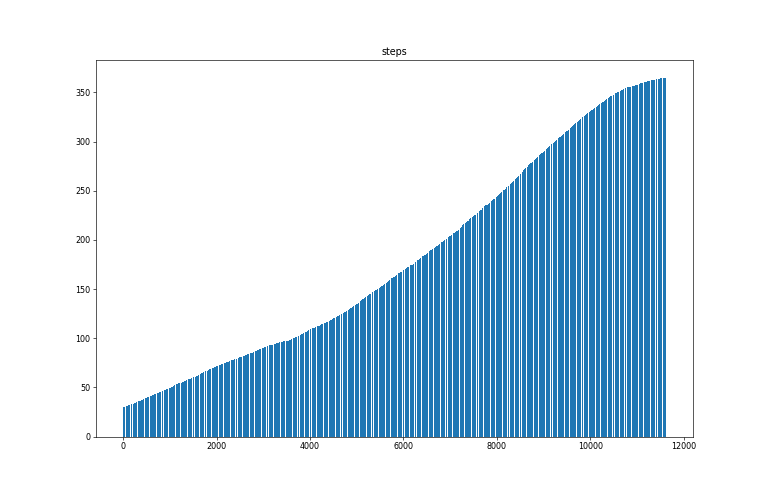

In [68]:
print t
plt.figure(figsize=(13,8))
plt.bar(range(len(N_datapoints_per_user)), sorted(N_datapoints_per_user))
plt.title(t)
plt.show()

sleepduration


<IPython.core.display.Javascript object>


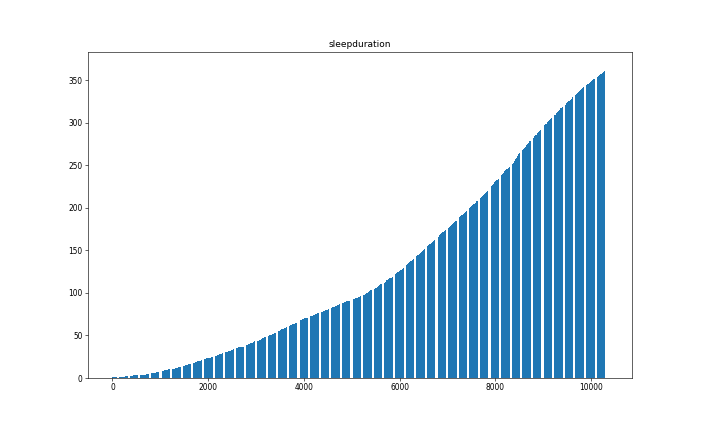

In [54]:
print t
plt.figure(figsize=(13,8))
plt.bar(range(len(N_datapoints_per_user)), sorted(N_datapoints_per_user))
plt.title(t)
plt.show()

bedin


<IPython.core.display.Javascript object>


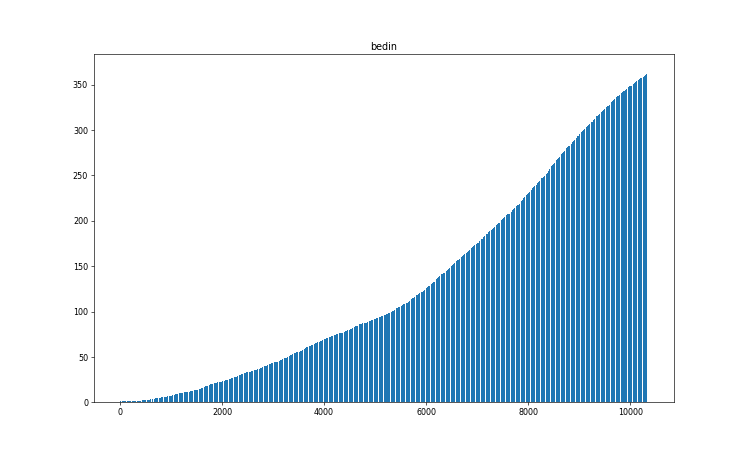

In [62]:
print t
plt.figure(figsize=(13,8))
plt.bar(range(len(N_datapoints_per_user)), sorted(N_datapoints_per_user))
plt.title(t)
plt.show()

bedout


<IPython.core.display.Javascript object>


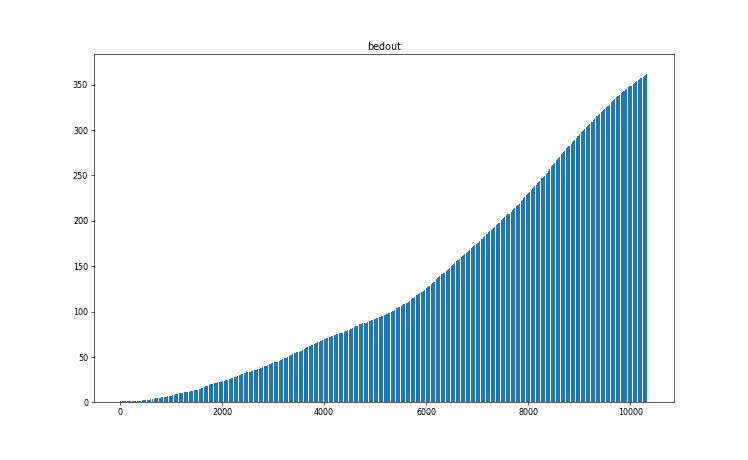

In [65]:
print t
plt.figure(figsize=(13,8))
plt.bar(range(len(N_datapoints_per_user)), sorted(N_datapoints_per_user))
plt.title(t)
plt.show()

In [4]:
# EXTRACT USER DATA FOR BLOODPRESSURE

from datetime import datetime, timedelta
import time
#############################################################################################
# For chosen type extract time-series for each user, save them
# Do data cleaning! 
#############################################################################################

t = 'bloodpressure' # type of data to extract

types = {
    'sleepduration': '10',
    'bedin': '11',
    'bedout': '12',
    'steps': '1',
    'weight': '2',
    'bloodpressure': '4',
    'heartrate': '7'
}

date_shift = int(datetime.strptime('2016-03-31', '%Y-%m-%d').strftime('%j'))

def convert_date(ds): # take string date and convert to day, shifted 0-365 = 31/3/2016-2017
    return (int(datetime.strptime(ds, '%Y-%m-%d').strftime('%j')) - date_shift) % 366

d = {} # to temporarily store data for each user
cnt = 0
st = time.time()
for row in user_data:
    UID = row[1]
    
    if row[3] == types[t]: # type agrees
        if UID not in d:
            d[UID] = [] # this will be 2D array [[x1,y1], [x2,y2], ...]
        cnt += 1
        d[UID].append([ convert_date(row[2]), float(row[4]) ]) # [x,y]
        
print "Time taken: ", time.time()-st
print "#measurements of type " + t + ": ", cnt

st = time.time()
cnt = 0
N_datapoints_per_user = []
for UID in d.keys():
    if d[UID] != []: # at least one datapoint for this user and the type of interest
#         np.savez('./../Dataset/clean_' + t + '/' + UID + '.npz', xy=np.array(d[UID]) )
        np.savez('./../Dataset/' + t + '/' + UID + '.npz', xy=np.array(d[UID]) )
        cnt += 1
        print UID,":\t",len(d[UID]) # num of datapoints for this user
        N_datapoints_per_user.append(len(d[UID]))
    else:
        print "err"
print "Time taken: ", time.time()-st 
print "#users who have type " + t + ": ", cnt


Time taken:  8.66261792183
#measurements of type bloodpressure:  71926
dced840718616e6be2b754310785d8ebf5739284 :	30
93ab9a747da18376c03eab13a81677395aa0763d :	1
082e441c27e2e9c0a2c6f34ca2f89e03c7687b51 :	2
633cedb1f6bd6d8a4e94be3afa49813df2024111 :	71
347145b405e92edbf6d2362bbca5b4bd82d83c24 :	2
a6e91bdfd85f45bcf50bd627758aa9e145007e25 :	214
7d833a301cb9e41565064e9082075a62b92384e8 :	4
5339f5ab8903d83984bd26cd99e3c3fa2b90ffa6 :	43
e179653996ccd6a5cddc943319c7790c81c9200e :	3
fd95d8bd3efd2c9eadecaaa584587fa565fe75ad :	1
ee4d0cf5fb89650c8b4782c9a519badfcec04af9 :	2
f66ae1a94ad5ae25a25388aae8a2895c9fdf487e :	31
7eb7b997b54bd969b5a07ab8e62a8cbc6215bd70 :	13
b88545537320abfbfe6530e47a678564edca0e0a :	1
7ca49428f50f2834189b8f6a31ff8af8fc6156ff :	1
3b43a962cd9f866ded00648ebfa1168ee8412c57 :	13
2808e89ee456794d6cc0716d76430fb9fa59e90f :	10
30d96307f800913c39e71c6b52cfdacc3509de80 :	19
c4f83175ad0173c801b5ef48db7488d5105e210c :	3
ee68a4b791eef7b411e0ed6287cb75a181212816 :	7
ff139d8e6c96e541288

4451234438170faf79fbe000f478c8137b2bee5e :	108
7fd6089d66cb153b5665a01030ecf1fbd24766cb :	7
571da31eaf16eb642f439dcd43522ce91a8385ed :	1
9cf10bfcc5bf9a2f6e5b2527ce3b60c4e98bba2d :	28
3483625df3afdc33ea311eee810750a42d9ca64b :	8
1a5eb57b982b4e8c65d839642bdbfc10839cb3c1 :	1
b6d321a5ec5d6430ec76d87ec6abfc13c1b68395 :	1
1072710bfdb421c051bec5f360d1d96a5c86108e :	35
8295494d83ebee343a4141366780827e80812bb7 :	1
d15002ecc5850d9eea60697feb32cee48057bd3b :	22
0e4b2a49f3593beb9bcfa0caafb751b2407dea6b :	11
b59f290f467a296d7dd01978daaf4e6b0eeaad7f :	1
235b4573a2123ea2dff3aedf966b35fd6054d428 :	3
f775fc4bed360f85a084b89cb828ea18dc517a6b :	278
b6139949daa48e8fdba16510cc8aea30b76b08ab :	4
41a42682810eb8a8c0cb90af08b62d47b4a030b5 :	6
34de40afd9f5fb971c623669c35dda63a72944dd :	5
56bb6f8caee2b6033a616980fe9f040c5ab7626d :	3
8b3741126076526697caa6a2ed4adf9cb0e1b522 :	1
e5752aa6bdfcd1d77edbce99823936f0ec71cc77 :	2
921c9d40306e8f94a38bc9519c5161b9c1c14b28 :	1
c30a95d6dee990e774de6834d794742318542eba :	1
86

aad866237256ce97634f2f74721736e82d2879b5 :	18
58d32c3937ec95f03b069170abbb2c5eaacef156 :	4
5f7b42ae5b91c9b10f11a36569310fa793b6e08a :	1
0f2ac4fc7e2d2cc01cb0ec54ac5edb02485a39a7 :	2
0f8c3f06bc35f04b773bf5530c978d1619822642 :	19
d8edae5cc1b40a7660377ca46e13646f0e66cb14 :	289
2094cf45d146121cb23f3c2da5b2ddbba837467b :	1
1f7149790aebac0c38314a1efd7e8f830b055caa :	1
f2bf5b5e6823e463229e65179427455e3f4aee52 :	7
c63f3d812333e98b390739f6626d09cc2d2eb0aa :	2
1c95176f38842682439f4ebfcb8232ece4e27aa0 :	16
cdd1bbaa3da0da85b05a1ea0b7cb7cd9cfbbe014 :	2
e8def2761b29aa7c10cee0281837e488d3337792 :	13
301d7a6e90326fde65186194d6a0fef431ce2ce4 :	28
1434c0e70489a7e700f927a3f6d3f23170df6221 :	2
bb880bd9e60eb8e0508bd37b4276a0333f84ef13 :	2
3b047aa82de9efe2759302a56c3561c335db7e1a :	40
ddb7b83d9f462e8278577674017c9f5031e3bc96 :	1
25110a7b6688690bb37e90a57140b551cb023d02 :	1
15ff764c20649ce6a29b540f6a25876b15e66b20 :	2
8bde05de028c576d57988231794def5c55da30aa :	6
5611994cb7073eddbf408af84cf785cb1f45468c :	2
e6

e3f0d4dae3fff4e1d27b3a17963629fb3b38ac5c :	2
8b5fcae82f26c25f19967966875fa266d12ac1f2 :	1
ba2dcec2ded3e68f1ccb5d8fde5ec7c981cb396b :	6
b43ebfe7cf4a5296e404b6c4b3b1af22c5d046b1 :	2
211e01aa0136c3f54780631ecf472956b1a68624 :	2
831acb08cf43393f0fd4ba7a6145ba00ac7476db :	8
b66cea80dfeb273976b57fe4b4896b10faf2b298 :	10
15a758503ebf965cf593ae9af655b60f5e826532 :	52
68154d41f485ed1f19bf3ae544221f6227619ab5 :	4
71c245004537b19f8c98435a9d93b2854eb5d63e :	1
7124641a501b4c12ad09b48d076c41d9108e60e1 :	2
67dadf7401bb6e8faf888160c6bd95c12c35772f :	1
a61bbd891af0a5c51dab1fcd5e15cf298733a63c :	1
edafba94efc74040e8289337173bcd679b45cd19 :	5
4a56af66e095764c1f2e77810fb5965acdcbd372 :	10
11768abbd7c2fcd35a0da56c4972de45f1e10033 :	33
52557b3f4afd08cf111006270f70badae5936077 :	1
4493dd5603e048e795cff20f5234703c179090f7 :	2
26b6e8b12504cfcc63ad86e6f06e28aeb473439e :	1
5d03faba03cd0f9144ee98de580c7fa43b848721 :	1
97fa9f22f25f4c5e8a0601acda0cbd765c9b33eb :	133
58772a8d2c4c165b7d8e175968fa894f1a53ff00 :	7
e0bf

9231918c425fbdf57787e0807700f0af61ed0bb1 :	54
b893b83ecedce1e4e8149c3e18cfbd07da6b1147 :	10
a868d0bfb05f69e687b0127b6671dfcba608b97f :	2
8861305319d091865665287eb47a214bcedccd98 :	1
c7b61df84f07cda0cbcf431f03b399a3a82edd5b :	49
6d40a456d4325307e370451130e162fa0ff16584 :	29
833591d55c6d50f70a30cc5b137a3b099cc18b24 :	65
2b254f3f1ebe078672d161d0a5966054d63f113e :	1
04e9dbafdbcef3608630b3f228b57ce6e0994144 :	22
ca594a83144285716d2add2ccca6be61eb030ffa :	1
6ae1e58a6f5306ff312d1850b71c777524673a23 :	12
ee0a3fa4b17e7465ce08ccf6f9e6313f6dcd58bf :	18
62dc1b32faabbc7649a4228fc0692b44b5aee9ea :	1
697c4a66d46b588a8ea5032aa43d5b6a12a877a5 :	7
c4213c530cca5dc8c656024339feabe7e3013c58 :	7
49a3ba7ea79da834c53f5d9e880427afe9a5b243 :	13
f3bb5a66df6dfe750fafc817ee6e9960f3c215b6 :	8
7659567b974718a4deb1f46f2e1e049673be5099 :	1
ace4edf97bac35b5b89827019d6b1ac5e5165668 :	26
34dfc63dca3aed58cb767506daee8f2ab4a2005b :	7
2776f176a27b391fa60b88eddb27ac0117ba1565 :	20
3af8f5432858cb98b64982565d32218ae2942cd3 :	2

ca6823cd0b751e8bb6d6b835755215c42b381bc7 :	4
ec58e0a2989917faeca3c6252039cc319208274b :	14
0a1cf2b3118770cd2e28422520dce6d969f4e679 :	2
5540f48a521b4d0d8c2cacdecfc933068c8ee169 :	43
c86bc34dacd0fa91e52cd8700f2ad798974ca639 :	47
1e9e56075e75d23a0d3eaaa5e95de3deb85e0605 :	1
8a238df2f985f989e1f953d1a6613b0b7b71c3f8 :	6
356c1bae6af9705bca77fc101542ddc32960d214 :	2
735d3b45b1427638afe047d77f8cf8738217f4d1 :	1
454768ad4f42a5a82fff02d8705fc28a591fef17 :	2
1883b8fa41c73c06c02dc7b2d3d9e345aff5dfe7 :	1
4231e452276b02c7a0b6cf790fcb1f02944ca3b2 :	25
b568fb067b98266609930074b123d1bdea96c210 :	4
8e3a8b1d95a22903cf7ec7cf790190d62ddd2578 :	1
dc6cffee3a317dca12c4db500d06c0d4fb484eaa :	126
c876620da8066555f2015afb1e99aad93b926567 :	2
2bd3c822372e08e249877c33aefcdde9fedc4eec :	1
26d86429627765837e4358d6d7dfd0d7d6ec11c0 :	5
8f6ec9d3407e2c5c4175ebf9682ac9f8f1f4aec8 :	8
0c036f5e96c696dfacebecec702cdc55a550355b :	63
e4b325b399b284ee460b9d136316ad02d61f1369 :	85
a933601e3cf74c50eb928c4a8c42c8bc3930c1e2 :	4
15

8b037f6300e7b6c712dbfeae3e031b5410c7e2db :	1
0c20bae78cba4703c5d6fb6f73774bdb06c580a6 :	4
afa2b7c0ea3e0f0a59043129121619aea9b870f4 :	1
51f737024323732f876bb22ea503cb80d2287a3d :	2
a530123a52160ee74a678097bc565b87ee78dd6e :	2
975b20433ac20afbe86ea0f6ac9cb2c077102b1d :	5
fa76ebb3cd28f7b32ff300c0e7d85dae949ccfb1 :	1
33e9d90bfdc74cd3d5069f2820e693f2e18cc4a7 :	2
c058809e7ff1485d12594dc0e43772b36d9e6bd5 :	1
ebcad2eba8a266a105fb771e6ecb42109c3b1dac :	2
0c22ade7d4cf6181e3a9a1e0dc48c0034bb55e1a :	7
bd80d50db3c360d1a827df39665ba0b0228a1001 :	1
16e1c1e047f2315446958eb604b33eaae0d1d724 :	1
c1a6fd187fbe5b02f7bf63ba2b0df90a6cef8446 :	2
835d26742b4e38938d5b9082c895275634a8f54c :	1
011dbb5bb49fad1a0ed1d7d04b13417deda968b6 :	30
f11bdc51fa1b856c4a711703e3b6823eb1ccd1f3 :	1
b64c847a14338104853ad729c763689326e648e6 :	30
dce869f76893f1d419669d49a22af061379c459e :	62
0fc8b62830f4949336421af32f4cae30db6108a2 :	1
e69edc35819f5a5acb1c9273cac8a8235c0f3c5d :	1
19dc16b9b0f87a6a832fb018a53ecc9d82ea0761 :	4
7f0ebdf

c892f7cb8234e7e71d9738d0cd00d747f3bf00d5 :	53
8971ac51e1b85609f01453fd406e842602f7cba7 :	2
afa39e197b986ab78ad717be2257e76c3670b317 :	2
8fb2eee766ea705fe5f9497088c9dd6c37bcb1b6 :	54
f8e93ccd353bf29bd77b66bc8abece78ce630456 :	1
acdd9edd1bb8ad2ee2242a8bc2b73701c8634c9c :	3
f757ae5d5807e33b594d989b287bcf6560373ed6 :	72
aef08bc890a55b911de1075ccb0dd795eda61778 :	4
260637e81f0cdf4cc1ce6cbf673e6b9471f274b7 :	1
eae910dd665805ed7fcd2742b410db6b475b5318 :	9
d7749cc576f25972a89c8483846b9602c52e5751 :	5
cf2cbfd29d8ae5e0355c6578f3275beff8ecc819 :	8
4abd2927da3507684c3bf4270bfde661f79a8490 :	4
23ef7aa8e6d11c9add97fb58a45cc5009b29f0b8 :	85
10d76c0477f6cfdcf16d3f1ae72f727f268ec639 :	1
89adb85aba6dcad1f78b1a31c4f1d4cd7c25a5b6 :	2
e42f37d04d16185c382c5c180468786ac99057ab :	3
b74ca10d2c1d9dd5bc1e503b737b65a8e0aa4606 :	2
044fbcce8ba9c06ce34f2c20851e9172517bf140 :	1
0b24e7b49354db2dddaeb2f02b3eb20264686e8a :	1
7c2ea60a71ab9b1f0bd69b84cefa38ea3ce3e242 :	2
f15f94d245ca303c57dce8d8985291567cbf15f9 :	5
278ced

687d33d47d58b776913c8fadda2f958bb28eb75a :	1
983d0ffcd4fd48d4753b6dc5fb996224d503f4f3 :	111
5b43601f89cdaa1c4fd4dfe07133dee788a7c392 :	6
6d0ad352bce7fcec5c4dcde04b62f4477c926f5b :	22
4ba9e9e86fbc9d9e11075212d77ff4a74de1510a :	15
badd3e7e43d028fd320a734f612bd2e3eed6ebb4 :	67
9a7aeb17f91394ba827a3d78e29d0c20b27ca283 :	2
b6a49ecfbb71efaa432ad8b54b0953adf4f93056 :	4
d96da7c7007aef2f6d8a2dd86434d5a9e5221f9d :	4
89ab4f4129707c4078c6912f89921191f728abdc :	1
479dae21b9870a03643f988964323e9a48f7e54e :	1
84714bf564f90fb70387a4bec14b20b3a7ad06c8 :	64
1e5d8100cacd84ba61aca0692ca7a4b4576fac55 :	3
bcafaaf92b006213f0f9ce489ed5be3e3f222f92 :	2
33e74f5072e4eb2e78b84067cda9d7c6d2947b1f :	12
df13bdff99c828186ed1f2babe5729a171190ce5 :	13
1df441abf899f49a7cbc102190622f3f2334f7ad :	2
bb6b50454d64b8616a50c2a517b1ec6c89581462 :	2
ec077145e5d22a7f0eb3f56102b37feab39149fe :	23
81943bd42e71c6df1394b9e49266572426ecd58c :	8
47441cca57168e6ed4f95896bd9b5a6d8eb8f214 :	177
4b09a03f73fd48b7a86efaa14571e2d2d9e07dce :	1

cdc0d46997681c367879be9bb3ed9bf1c165bbc0 :	359
6f65272d42d51c8d99fbc53dd3f535041ad33bb9 :	52
0ebda9c9d046ff231d6d36e8c97a257eb8314d49 :	10
755fe6bb8708ccad92c2a1a253644f57db083f5d :	2
71469f14572ccc208c1a088f64efe3a41d0fcdca :	10
06548e1a4af991991c2b0183db0a7b94b985bb87 :	1
7de7e99f9ff649aa50aa9c0662e7afeb24ced10e :	1
9901da9c651d312bbe5fb7ba61bb6403530caee4 :	1
23aef98cc2db34d80db33caa55e3f868fde2ff76 :	1
4a449078e4c7199d7f2b42d05ed0a4566d790739 :	1
f7d3dbcafd617b05bff154257dab6a2e7c827212 :	8
d0dca3e316972e1b6d1e20b6e00bce3d89f6fe76 :	119
5f16bafddff4b8bb2643dd5392c11117ed935e60 :	116
8bb9865a48139e883d246776e650daf716e7e0b9 :	108
b1cc18eed62162f2c0b1b4e0b9cd16d27d240dcf :	2
1dd566eeade33d48b37e982d6acb874ba0d5633a :	19
db441ec2bcde35f8f720876725150b62e2ac69b6 :	3
0fd4a9bb71ff43ec08a10397736bde00dfd36c06 :	29
4cedc4e0d495ef1a27ba49ddbd984867b268f2a0 :	17
647edb9db1ad6c6ea6617c111f13835429bd77dc :	1
b7802bd3101fef969a3ec31e6bef3f6851fafd33 :	19
e1d90d7db8f8b343cdcf057795a8e9d33e5e87d4

756b23d2798587920add38a41bb79f986c4ca138 :	4
3c1baaf53077cb73d41384d6b188494b262728e7 :	1
a2934284886f185c388d8eb21ef18a3bf6f8cc62 :	20
2cd9936d7954067621267ec0cd1ed99cd7e3b009 :	14
748bfbd4c7ab3e69720bf1360ee6cad4a99a8c29 :	1
47f12327b46c0cbc848b2617a79c51287d60126f :	9
8a2004ddd7d3b930e1703ba8f767855adcec5a7d :	1
ac5cea3096be13a4561a1a46aa5feec601e92331 :	2
32927a6286f8f71b8912a1a16d2999e0cc207c03 :	3
7ba953bdff519450bca46197d0b73191860305e7 :	1
07f394684f7b4af430a3912705b93f172fae99e9 :	5
d935794e8af1d328ba26969318ed86228146d9ca :	1
4be48ada063fb4e6f71be6a7b329b519c9de3d33 :	18
c30d5eabe02533860a058f0154ebddcc7e467056 :	1
24188a951b7c0cf961a7af4f624e8fcf9d3be8cc :	41
6e3948b3afc5e409a34dff409146687b7c34da4c :	413
e60b48bd0c95cf6f30f10bf70c0be102e6552387 :	2
601689b2cf7190c40e317e5ed918850917517e0c :	12
a37ffc597cb144c669749355a6884f4fdd5f0f8a :	1
78caa27e257f76fd2fcb59f29e3aa5afb4aae4bf :	31
35daa04977d805f661802462868f7e411d1d8c40 :	1
4d7b543a0dfc165da105398e4b62fae6d3c2daf3 :	1
d2

In [5]:
# EXTRACT USER DATA FOR HEARTRATE

from datetime import datetime, timedelta
import time
#############################################################################################
# For chosen type extract time-series for each user, save them
# Do data cleaning! 
#############################################################################################

t = 'heartrate' # type of data to extract

types = {
    'sleepduration': '10',
    'bedin': '11',
    'bedout': '12',
    'steps': '1',
    'weight': '2',
    'bloodpressure': '4',
    'heartrate': '7'
}

date_shift = int(datetime.strptime('2016-03-31', '%Y-%m-%d').strftime('%j'))

def convert_date(ds): # take string date and convert to day, shifted 0-365 = 31/3/2016-2017
    return (int(datetime.strptime(ds, '%Y-%m-%d').strftime('%j')) - date_shift) % 366

d = {} # to temporarily store data for each user
cnt = 0
st = time.time()
for row in user_data:
    UID = row[1]
    
    if row[3] == types[t]: # type agrees
        if UID not in d:
            d[UID] = [] # this will be 2D array [[x1,y1], [x2,y2], ...]
        cnt += 1
        d[UID].append([ convert_date(row[2]), float(row[4]) ]) # [x,y]
        
print "Time taken: ", time.time()-st
print "#measurements of type " + t + ": ", cnt

st = time.time()
cnt = 0
N_datapoints_per_user = []
for UID in d.keys():
    if d[UID] != []: # at least one datapoint for this user and the type of interest
#         np.savez('./../Dataset/clean_' + t + '/' + UID + '.npz', xy=np.array(d[UID]) )
        np.savez('./../Dataset/' + t + '/' + UID + '.npz', xy=np.array(d[UID]) )
        cnt += 1
        print UID,":\t",len(d[UID]) # num of datapoints for this user
        N_datapoints_per_user.append(len(d[UID]))
    else:
        print "err"
print "Time taken: ", time.time()-st 
print "#users who have type " + t + ": ", cnt

Time taken:  13.4648458958
#measurements of type heartrate:  402466
5380dbe14a7ebac3702ad4eff8b6749180543935 :	1
3efcff22369a9985d8ce4060b784482cef52e747 :	110
df397b753c95da72dfd12563710b8ca056601f02 :	3
74a8901d7ab3a95e37dc4fd39ae5e2e4011a9330 :	35
347145b405e92edbf6d2362bbca5b4bd82d83c24 :	54
9e08ff716871a0870f5e307bcef8a3d2cbbb8886 :	1
7d833a301cb9e41565064e9082075a62b92384e8 :	26
a55a5d97fede060aa137f853e562e512c5a92ddc :	8
785280cb5e15718b6ef6d0678e52f2c6ba77f50c :	10
29cb5e54a90303b4c4c27cfbbbb38b9ea7a15050 :	7
af4c921c17c765c553ae9bb60d29e169f5144be7 :	1
64b12c7738c53d5e92a015c03acbdd71ec0e6a4a :	28
fdf6cb2df62bf975d5b58e377f79f6201c955862 :	3
7934eb6a529914eac8073536bc79e9fa3b44f6bc :	2
4516ea7491e4d0d7d0cd7d534442e93591b41ed8 :	5
e66dc59cf3231a46ce4f83d6dc0ce347972ca21d :	1
2df8a29cab36d073726fcb17a9940afcc56a3a68 :	303
c72ab5cb0faafd5fdf396cf66ed674545edcc88f :	6
989f89cce58c201ae6992f10239e8811738d8e20 :	1
8ecd6f505a01ec5c26aeaadb37d6fa8d8d75dad9 :	34
67c424b7b7c97c5b33ad4a

a288a8450eea6051a3223a176ff1c813a6f1bdb2 :	83
29bf9fb6868f56cc0e342e540e32eb18c01c5459 :	54
1e34d60be3a0d8a232b360fbd84cabe9c048d01e :	4
9c215208e16821418804530096750c7c2c20313a :	121
1120be9fb69f01da2752f80ffd3c69084d78be20 :	2
333c40e1bc29d3c0fdd963b323ed899bc988495e :	35
6477492149950427cbe6940e3f1bde5216eefc28 :	26
35eaa4a8379ec6e9ecc1145397f1be6e234e00f6 :	12
b4b8956274baf08a1be5a52a1ddccf6641fe21cc :	1
a223737394cd523325aa10cb4ba10e5d7036b55b :	1
2c9d92515a512536be142568d59a7d3f1c9bf9d9 :	3
867d43719c1e4eee60ccb5f059c53adbd29fdc21 :	3
427514d048a3b0b8c352f195927d1defe5ff144a :	26
04b2a29e396805b1a628336cdd30ad7b7f259974 :	3
0a82a878909154148a5adce11b63663cf312b54c :	15
06d41db4043d9c55afaaafd425e81c8b7deb4a48 :	1
6b326acb684cfbb31f16404b563c8ad646a4d576 :	2
d94e6b23ba8cf1526f752f98c70b6f2bd6616780 :	12
e50650cec94cdc47566976a117b1849b7e5f92d0 :	3
cf064056bb2fe238f3c3e73363779ea404a3c941 :	174
94ddb6b2b43bd706068efe9c402499bc2dfc3bde :	253
caf513c4b8c41852b81c560f59fd690d0d65f05c 

b75a6a29c08589c6a3a2140b9e2c9ae0d63ac7b6 :	82
46e03ea2f49e48c599511b19f29fe75ca4af6d60 :	110
f773258d6ecac9bdfffe4761e345b03d2fa2e0e8 :	2
8f5380de99f174307e0ea955ca21dd20c739a168 :	1
8390b5f958f3386e7c935dbb6909aadf8eb5fdc2 :	32
e1ea5b4d45264db639d202c160dd5ac00f99c8b5 :	117
4667c8b2b4afeb7a62d520150617e49fcc305a22 :	1
0c0b6396fc89be14dbc5045e165fa2fcbdfef8ed :	1
8ec9adcbacec4b20041f457c9693d95ee5abee40 :	6
fef2dc204b7dbda96058f89ef9af7e64322f4bd1 :	2
4d421dee147796ba6396afde1b6873ea73c5f0fb :	10
74bb81ef4a0020c974b3100d9c672edaf5b49659 :	6
c06bc0ab05f05288b0db4c98befc25fcd575b79b :	21
b3bd732308df24a0602411a32f62b7a0d18a2abb :	44
8689ca141d19837dd054ce9210b8a6e209aa876b :	3
8116263711718532e73d4c73a4dbe73eb34b53d4 :	9
fb61e19f77f8b29a44e518f7eeb30de8447e23d5 :	16
c65c08682bfcf88d40b88238b3716095f97856b5 :	1
ef807f1db6c77dd2e10a0cc3f4dcee3f5cf97368 :	389
73bded5b052cca8fb226f65cc1d851016dbcc74a :	56
ca26a9f3ec9ebdf506ca38065bceb9c27d93f3ad :	36
ba65e7865ad8c6af7f353102cabba143577409aa 

3d54146440c2653745b9fdfe87eaf97f3fd6d4ca :	11
3b942bac9f6db33af983fe02b1e3f8f8d207a9cb :	16
e04c0e4bb9570e87a1442c9b0b0a06aff8dd52e5 :	1
8eaaf5844999c3cbc64adf244aa829d81d7b6818 :	21
0f9ecc65a4bd05bb8e0eed65e94507349f8b2090 :	1
1bfc489497799a64f39410cfd39b8306bf389bb3 :	1
b1bbc37ae548833961b5c4662bd2137712c9ace6 :	1
e5fc88cc72cda05123ae5c94ac10d8d020797e8a :	48
9ac205bc9249e1fced7873c101524c6da3123e76 :	36
535fec9726c3dca55093f52650b68baf5964d864 :	222
42b19c23beecf4ca7fda7bebaa3deda00cc067d0 :	2
6e63ad641a0d77865fc1dc837c25393f153b2c25 :	81
d796ffb6f05a49bddb9957ae2994953c53af7fe1 :	4
c1397210886e5812f10e11aa19f78cc6cd317a71 :	280
ad9a537255ac7c9acfd61d8f5b9e2ef3dd941fc2 :	132
b86e5d6b74ee17840693e900a02b4ba671d79b90 :	5
480b23efc950b779ca87ec0c8812c2c692872740 :	3
8101b68e6d457d3b101595fd2212c850735f89f8 :	1
30fafb6acaa298fba782a914cd6ec5570a2ec489 :	82
7ca3fdb2bdefcd85dc5777c6d7732c15673c7031 :	10
8e6e9151718fee515a58a60f382333c510f90c26 :	10
1ee7548da1f6b2ef15d28e8f1754b078e3cfa7b4

a346113826aa481694ee4431e75945594d158dad :	6
4e700c242e17692d3295e26012442294d8a10b23 :	8
534c26a70bdbc61a354b8a635c50e587d0b0c211 :	2
0a80514a8ec324a3345cf72ab46f6e09ffe08a71 :	67
d1d584ff05789363580ea621a22b111ad003c7a1 :	9
f7bc6817377d4292c60737b3729b530493ec72c4 :	1
e2295fc8dc4fb916de2ce81a9fb854b8d49e5e93 :	7
dc2a800f0e8c5fb002c6400e58a37befb25d8cb0 :	9
48aa3e496c1fe551ea98219645cab360c561113d :	200
91b310dfb0689ca8867ca2f19052a5b790b8d5f4 :	4
644591916472b98aedc696eae6e6803c0e9bff7a :	64
02067538711383c5d0ea501ea14639a41123746e :	231
ee445849e3311256549a483aeeb3091d40a45074 :	95
373879a5c41e031f7ba5dd52d011a5fe50575197 :	2
d5c1ce7c315c820337c3c788bbe51b5b45f1c1ba :	10
180323f2ac15f6e29c22e260b129702ec53060f9 :	244
21485ad91cadbfde47253f88ac75af12e6db4e9d :	3
28c4db0493729b988d66e703cd61ce385f2918e2 :	9
ccb219d89a128fe22cd09cc5715196fc61520f43 :	10
935ede391f621df9e9d2da500be89e98ae8dfaa9 :	189
d0f3389fe78bac31af4f1752cc417ba89613a5bb :	13
3e8a840fa35630baaa9547903ea090f4a5a10b44 

f3c8cfaebfac06b277f04228695f1b9701e18abd :	160
99601eae7bb344072d04b32cd1bb104bb8a978fe :	158
4aad9ed18332c1eb25ad6cc8cf94455a5f1c7e92 :	1
f9a7a5a43d34e0a8aeaa24a4274fe7fec0f9ce10 :	68
ac707c4d6e99bc2814c19028e6654b56b867dfc5 :	226
43032e967103964e57f7c78cc7d565963263944a :	220
e8f7c9fb7bdad911712d30ba8408662ec9637ea8 :	1
5861969ef4b687a3941a014e0fa69719dbd4405d :	16
360d856c10f5269f4c8aaadfe04fb4a85a9320a8 :	209
9c1e8bf2d4aad36cdcd347fbc504da3d540cc594 :	83
d2c531cdd73effbaef3080744a8a323cd4830d44 :	105
19d574cafe9338d8000d2600ede6f1dbbc265fd9 :	4
486e915e2b886e5ef3bbceb786dbab4cb7d05c1c :	3
d46cccee00aa09391dc44fe78079382e2b25ab1d :	4
f15d2278b03d7110c4967d43eb918ebe59225984 :	16
8f34d24281962b8decd6b45bc2250fcd93f04e0a :	7
247d53783b6e6911f84953746aa6bba37e785bf4 :	2
5f3dd62b3fe0db4d3ae281d07d3ba077c984eb2a :	93
4ebf375ebcb1607d442b2ff60be56f27dbf165ed :	1
43a91790f9060b7c4dab8213c4abc6aced6d1487 :	72
a570b032c91dfeb95fa5438a6448d1b28ea3a7cf :	1
3b0bb6db044de7e1822715897cf1d72f8364b

d93bdacfb7c74a8e415723000a4107a16807544b :	466
8a697f92640182cf5c0533a4ef4b5f9e1305bc8b :	48
d3aacc951b6eda3cc9f28bc0fe5b760ec48c1783 :	5
edcc123aa11232622877edc05952bd80d4c755d3 :	54
5f89997e221cfa63b5f29e2dba34d1b9dab54ae0 :	20
783b40c957a3935aa13a3f5d4dab4dbdd908fd3d :	26
44ab919081dbeab137d014f327d41cdbcf77da85 :	2
2e36678efd4c2c0a743503be9ddbed69a6e59787 :	4
6fb643974d22fcf89321dae5941fd10a220d2ef7 :	295
8e2603b5af530c5703c9692c66e8bc3590c8e2a9 :	1
99256fae2e01075463e6ad9bad7350bd934e00bd :	1
3bc379da10fe8d6f82e770721ec1bc70d7dcf3ac :	1
ac5cea3096be13a4561a1a46aa5feec601e92331 :	3
32927a6286f8f71b8912a1a16d2999e0cc207c03 :	26
9635f0c6305214f930b75a4a6175f3bcd0e26dc8 :	11
93647d2e77abbb8c293f0de47547c6510096e6b6 :	42
d935794e8af1d328ba26969318ed86228146d9ca :	6
d5c2dc833fb4c1034bb6947151bcfd76f125e257 :	4
24188a951b7c0cf961a7af4f624e8fcf9d3be8cc :	36
f8d9a9cb8a8245bcc59bb322391dc61c14b3665a :	18
33644f73509ef6679b19fa2cca28f754310d749a :	35
88a7ee340e7fc9598abd5e5b298d2a50736f0a30 

e62304edcc28af49bb9135ac6495488a4ca8133c :	11
f153f630d083fd775aa08ef75b332435ad00156f :	5
301475f5dee560e3bd2363432540a6f1caa25338 :	7
9b071ef3810f8e0e49a7a753742bd747bcf06d70 :	338
dddae43f376ac011bb81ca5ea539dac7dba38705 :	12
5898274b3632d34d770a5229f26af5ebf28530d4 :	65
43a88ff0795bad0df1f5a254a11f1f09feba29d9 :	112
14f058a1002a28aaa18f11ce58ff2617f0dc0058 :	10
f8e93ccd353bf29bd77b66bc8abece78ce630456 :	6
6dc8456ae1860dd6ed2d401b426d0238c55e6372 :	20
73e18268ff89ed22ad64868ef49dcf0ecb6eaaa3 :	3
a410f141dcb892da7ea4a789f48615f72b36898f :	12
0f0f13aed4ce65ffada6c54c156249ae6b2622ed :	2
88da3e698c712b8662df44696e4e0747a3efa656 :	74
8dc18b09f2006e850ac572329e2ac48fb21787c8 :	3
3fc4205e0cdd2e3408da7956029fb131e678e882 :	66
2cc0bc70199457bce73215c26d0170995156d118 :	1
fc71160a047fbb3e1be0b4b6605499ab362e5c6c :	27
be5b51dd49541765ae1afc608555340a925508e9 :	19
8b67f9def46d8fa425984895e52864ba3c2ce77d :	132
ee60a60c507e615b34d990676e4063f9dd524600 :	25
0776d5563904acd66d87aa62b10cb0229d6daa

0aedbbdc0a18d534ca44d9ba734a420246d58f0a :	55
750a87db794be7a5a87bed72e811d5d41c3655f6 :	265
f8bc2cb02917dc36a830ccbf8a8f0f7c8b6b53f6 :	1
ca3df408792eb60306196575e3bd842972e357f5 :	18
4adeb824f3e204abe30e67226c59c9a72cb3d068 :	5
9c98281d42fd1d85d72e48d6fe9da54313a190d3 :	97
e63ca305d032be6f10653c40d5933c020bf2a674 :	7
f7eb7e3eaf206099fc5fbea300708bfb01858a8a :	7
0874700f641a10c62efd3014ea18e8df23aaeb69 :	48
822ed2adef0540bf7d1afefff587d99e239d6842 :	32
a45fca9236202fee8037b044c65ac60f52d49641 :	72
30dc782d9f69be63ff607be168288b37eb87a937 :	128
afd91b8b55230608c02443ded0a0921dc7dc9181 :	1
94dd63a5bbaaee6ea32df8c0d4f7d44344598d28 :	112
9ee9b78046f0aea79e614c1e10529f1e1f3ef998 :	20
fa76ebb3cd28f7b32ff300c0e7d85dae949ccfb1 :	6
7ab090fbf8bb4de9beda86f40fc8f0ef7f3a0fa3 :	87
9193f77b03fd893f4d66627db3839f1939fc231c :	247
97fc262b50365510c8b458841cb2b9178781b06c :	11
6d7ec3082afaccef4957910573d1cc7aaaf4eb6f :	12
d96550ba0ede9350e83ef373a79c00265b814197 :	274
31be52c46d7b5e98a6e37f6af66fa13cfd0

42be38074d7f406c34026d392faa64ad5b2644c9 :	1
9642140ef71044661182fa5aa76cca3cb17554ea :	65
6d40a456d4325307e370451130e162fa0ff16584 :	34
04e9dbafdbcef3608630b3f228b57ce6e0994144 :	84
6ae1e58a6f5306ff312d1850b71c777524673a23 :	165
62dc1b32faabbc7649a4228fc0692b44b5aee9ea :	1
e0e86579ec675533b294ed83f01d29f0ce09a200 :	4
7659567b974718a4deb1f46f2e1e049673be5099 :	1
48ff65a3aa3686b5e919329bb3169b0ccbb055ed :	2
5d4ffcff8797f329041ddbb6649d1d0daadba739 :	69
a3c2dea30134f29522b4a64707c2a57f6563c753 :	112
9f65df5888abab0a77a298838e7554d12a6c9f1b :	88
737b71c3ad24ef1b575b1698d5b91f1932368672 :	1
61cca29f617f737e42148a13e0f1a49091e5c60e :	8
0bd404cce3c8b477da1bffc1e493d3727d52f8b0 :	5
4b82b38a3be2841dd9f98a7f981ed746b3a2089e :	1
26f6e36c2fbca5edd697816cf1015c4f1d072e4f :	33
b7a02510d9930d39d889ad6cda42a4e2abcba698 :	9
07d7d1f5ee946f658fb40e40732125c45897ed98 :	70
a2c66e805859718ac9e8717142e00863f8d44c4a :	1
caff0d84a10bf32749c66a6aca0cbace8660f920 :	2
2cec78f4a2756dcd521ea5a70719ab2b445bb14f :	2

087cc99a103585ba52573ac4fee23b9c9c7a29a7 :	8
d38a0fa0bf178ac458be74c56a7f6223660bc45b :	170
5dffac8bc0fdd9ba6ba9c714831a86a0d70412ba :	66
7c766f8b5fd7769395e3ee4b2afb4888fada61c7 :	1
6cce7f209798b8cee752ca4cd6a6e91dc583ad94 :	4
029895594fca17a2340feee307bf24083d817445 :	9
ae01be1a03597ea0eb7a6c420adb5a19aba4b914 :	4
45e455b8ba1c12e900d8baa30bd6ebcbbc4980c0 :	162
a5996b0d2939d9b067b073b5c3f4321a23d4323d :	4
d09b6eef29db84043bedc350cd44503457146ef7 :	300
fc46a5c1a6068b696ef31e6be11aad544a54d56b :	14
312aded26dbcaed259c73990040546ee5b8c1330 :	78
62278cb24521f9723bced8495748c9c62868261b :	12
198f1acc93365f36a5b527366b2e220cda677a24 :	1
4518b567648855e0ece2b7bdead425300b780a2f :	181
4e1a32b355f0dd4a649fd12ed6ddf07a09a408a7 :	1
4db4df406e915063415a830898ab3b8af1f47ddf :	4
01484d6e1d1c10a949a6f5f0a3f46c9d4c144f80 :	5
5fde428a17ad13c4f82eb74436943b3c9c3d8b50 :	31
b49399cef415b02fcfe1a72613c43f16717b46f9 :	434
3adf47c70dba6c69840f166a9e9f4dc862cbd989 :	20
25d1f5c30d36bee3168e4af2488aa8a1db4f448

d82e4be4a85f14e565be9d46ec64f83467ac634d :	28
a01a478ae80336ccbc13088efc63ea9cfc575880 :	14
6bc20aec599b6f912d65d8e04f5561637fe59ab9 :	1
92ce1259a160de7e55a1e6967fd3675b07186a67 :	15
5ffad5c480a92c9f9a4be25462b19b37e236d137 :	30
c4f36e1757362f73768b768b438d718193a1dcfe :	1
9eafc28ec2fbbb6fb8fa826b40bed32c866363e6 :	78
4c375a7c4427d7298f6e378231e2eb57064d70b7 :	13
cbd1ed3d6141cf5dd84ca8996975b4c5b63505c8 :	11
6c8951ac223afa5131b1788445aab472ecd453a9 :	21
770dc0a0a7e6dd2d60e288431c7b68786b03e442 :	1
566fb204f8d9992a7a441bf905f4763c5974b6cf :	1
abf1b6592e6ebdd545c1e5eb585ff0cc8e810230 :	170
ab89584d35d16414ad13f78db9d74a96994ab81d :	118
e5c43dd6fdd827c17f6f1753172fb12d2d63cbfc :	1
cf3b8f34fde7f60d390be781fd9c9c89efd56841 :	5
fc6985d87f96d159d665a83274b921c97c4b320d :	17
74e233901dcccb6c30ed276789ad0cf442f8dd51 :	1
13f5ae90e410bd8dc3e7a624029e7d347d969f49 :	1
9043b5dc79953184b257d99d3305d41623d12b47 :	78
7dcdd9a35afbe6b559c958913b462c8c1d1cdb6d :	6
a71880343277f78b5018d54695c8b234067dd184 

7cf1840a0179df1a1d5ba005d8dd68716b4ab091 :	15
146b69a432893a3bccb91f6e4718695deadefcec :	50
5912e7443f2ab6096da631822c7f70b1a64eb491 :	7
5f3734315668d264418c0088912487633168c8d4 :	2
495e1eadde0ab5a52c1005133a88e8794e108eb7 :	11
0c1d8c6a1ad9f6d0a139c64640ead5d78015d34e :	401
0973b18745cb2d06a039ee8a9fed8ca488c14846 :	5
08547094a82af90c7eb453d1b5adde42445225f3 :	45
b709cf078c9c819f23f7e3804bd923e43f6e2a88 :	14
941066a1b319cccf18d1396a9a7c77e7c04341ee :	34
3806e20e86e89a03ea5bbd75293c70f4a79a4d54 :	88
e5179c4810ad67475156166916a58ec6f841e1bf :	60
a90480e662f547d12eb03a0a27d1b98d2b8e901c :	141
2d50f9622d2b4950e133009dac0dad02d73feb49 :	39
6b0ad4f85c5e162f3908791036246ea5bf4cf8ce :	70
5a6fa5993371bd00e870cf529956633b232204b2 :	5
a454cc7c0f6f6666cd597725176455e75f749612 :	4
c83d8c35f5d85724eda9d364e35864b6f5422bb6 :	8
ceccade28c8ea9ba74c80d500ff58095e2508abc :	1
c875d25d1c8c663d21c919a1f0116198b1a5d60c :	38
02ecd5c4878c94bef3a5bc421c31bc7841faa2e4 :	196
835b7bae4db79392f76da9bc98aae4f12d2e49

78c42c82ab594bbaa682c4bd917caa374cc90749 :	1
f9555861a4f8d1c1dfbdbb8768908c808264e5c6 :	191
7219cc986590032e66ed10e34b96abfa26f81c4e :	25
af97ac5ed1bb6197c9b8592c3d622d817d134130 :	18
cea0c1487ae42c14d9d89281b762d116538e1e16 :	11
5b157aa6f3244650d16d959b3f9f4d7e47b3f718 :	23
440ff25329e20de135373f450b522c8bf7276463 :	127
c4ada18d54ccac59a71fba86e81b1c06dcefebf1 :	291
8cfdc21f0aec5407c18030faa4077b8d8503efdd :	13
d41bd2555dac28c2765c28da1d158f6a7cd61caa :	59
6924ad4f46bfd7e79eea81c7305eec5f55b5b52e :	86
46d58407276186a302dbdd3c052d11381183498a :	9
ad2b1168b4b61bb9c1a9f34fab764e2d4e6f1758 :	48
0670d15cc0cc6cb64f5265f3cad414723bba81a0 :	120
884d14ea25e822ed4d6b0ad36d4fb495338f632c :	310
58053a70e6910666085a20d352000a3b8d9b0afe :	21
0f2351c8d4d226d5fe5c865f58792bf08ed82a95 :	1
31ba710f1c3383a773638830372ffc5f63a625eb :	155
311cf64672bffb2dffe07d49217dc9b3328538b3 :	13
7661217c8dbf57bf7c4759e67ad3415ebb8759e0 :	3
9614e8a84ffcf17380e7ffa1446bc40327e52c30 :	15
8ae3b849c6f3907a516bc82c96c43837

d6316dd81086a3fb90f6e33a0fd12c700b49e14b :	1
8898bc3187e7277302957921833718cce9608c85 :	31
2e0e6a764ae455fad7dc64cd9fd6a8c0429af7f1 :	6
e5e4b60229387830b79cb787301d0c6ca85bf64d :	121
bd29ed480acd6536df24a398fb722e27fbeb03a3 :	1
816b1eaea61912d847c29098590b3c2d0213ca67 :	16
ef1434d245853cf70a260fd65b0efe048286f4c2 :	2
d202981a9da92609c14bd27507947d0d2a785eeb :	147
3369e59b294e1077cd681d591e82d6a08e033ca7 :	22
b702e0cb6617106ca1ed42dd413c2a06576f0337 :	1
7844eaccbbbbc099843205e88378f97042ffb783 :	5
2ec6460b6379d9bb79e35dc4b3fa0cb967e0befc :	8
bd58131a1bf674b55f5a7846e7c2372a272dd7f6 :	101
aec337b32590a27a4dd49daae762062a30cdfcc2 :	64
b3dc6a18250b8298e5c6477e643b3dbd7f5f72e7 :	48
decf3fa02c352f866d339634ee968cdbd03ecb2c :	15
a1f47a574f6285b0665b9505cb1a42cd58ce41d1 :	2
6fef518b4649db7164d1fc4e66f931007b490d03 :	156
e273b79d5f0e5f69e802bc0a39f123764d6b0a7b :	9
b626040fe0ada50e2cb03472b368766249ec2687 :	1
f9cc09458287eb9de794cc095397e1b4e2b4614a :	16
b45e3282934dddca8269e57f6f6f6dcc2569226e

a094c41293bc5097bb6c6ee1ff06567a1245b26d :	140
cdd5122f7cf25730dc8c26bc8378beada3157e77 :	299
e972439a0306e52225e7b84969fe249a2dd5989e :	67
e51c52490c3fbbc6b4a034e8bad7678f60ea1987 :	2
2a5168062c52793eee1752aa2f08a5f8d5293d4e :	131
0042647eda850a32c501164476c0c7a79108e0ed :	88
94ade8f51c3851447dbb53c5b81a453671b09ecd :	88
c89214308778271890bbe7848c8b69c627fa8884 :	1
50ff3044b5a76409193551effd4f3410ac708e74 :	44
5ebb94ccd12c014051272ee115df64c2ebb16b74 :	45
243f88f504f94b35630ec532d7e79ec1d0efa44d :	172
25e705acee749b8fad6951f4cc874535b0750e02 :	6
62a35078c1c6abd2fbc97a2288225337ed8c2ff2 :	1
cdd63300ca03f58ae33ba50dbc84b4d7a204d7d6 :	3
7b111c967a7fc64e8b5d031b7153e04bfccd107a :	2
e6287652a98a9a9974fa2fa3f68dbd0037994906 :	43
d210f47ae51985f1cf01520afc774a34d25b5b26 :	1
c8e91062d93487c433ea3f13754047aae024ea34 :	59
f640fca3bfacc9aeef46e81efd6e223a77c739c8 :	291
e09f1da8b2d0ea980fae4feea7f56b982995bfa6 :	31
e08770836f50af6161fe1b2019b9f47565ee3fc4 :	8
ee6dcdd86d8a278d8e450cba306b24b523ca4

779986c227e3dcd2c0cd201803d924086c941aa6 :	1
6018ae6fea3857903864de2d2bbd6713e0751010 :	89
e343f802997598d7b796d2a9b39f41a427170498 :	2
65c2f428e85628b6257549dfbe5ad8aa9d5e3e8b :	2
8adb45c5399ba572f089b0b1599fba033895f4e8 :	70
29f5546a3c7c71b85ae23f9312424f141ed44d25 :	3
df73b277a6dea9e33550581db8e2bc2f15ab37e4 :	11
a08f0d237d8fbfeed02ab3e42ac8442c4b61d1f4 :	11
ea532e6eeeaa5adb2da87b2ffa010c12914de389 :	2
f275fe908157035e9aa9cd43959027cce7258203 :	2
3da7a62d23a15b27d82bc9f5b225547a71acf79c :	161
b43ebfe7cf4a5296e404b6c4b3b1af22c5d046b1 :	1
15a758503ebf965cf593ae9af655b60f5e826532 :	38
68154d41f485ed1f19bf3ae544221f6227619ab5 :	4
94f2165082eaa45a11d099bb238b2bf0ec9c5ea1 :	6
3c6f250a8a04b42e0443a620ec7ff6239935cf5b :	4
589dacb51d93f452ad3a764893568e6161f0f25e :	3
357b5919b1b3ee805410d887c67c1a1eaf0e88c4 :	3
5d03faba03cd0f9144ee98de580c7fa43b848721 :	1
e0bf8a53a4b5763fee0ce5a5d346fb74ca0d65ce :	208
c77c5d14661187231975573682f9a323ab9cb63c :	30
327fdc4ea2fe7de9948de51e0e47f43bdb7085c1 :	82

6da934188108e49c8872c37c8eb42a4622e95955 :	2
9459b5bfa1d4a88d2d0d13d2d9c2b81cb285296d :	334
803498bb8db9e252cc07e5e039aa89bf67d298b2 :	4
8ab527d2141dc0fc2044b8c60079d056b54b983d :	7
090ae406dbda849a251335af51031335e2fc06c2 :	20
33241bc3d8cc935dbb33de92d941377d92c00391 :	20
6bd63a3c35b6bee7785c7a05b282cbe8e5a8d9a3 :	30
7cf6323ed8f3d4b29193eaf78737038b4d5bc797 :	8
2e16edb60ebbbcc9ef799f9404916de8a026a19b :	5
8f9230ee7ccce86a03759025ce958c426db23a09 :	5
894038bd6ff719efa948c8c4708fec3b7713b180 :	2
f5b49a07d5b6eb373bda2cd900d17d6d4ce9f48b :	5
80448a7d28b636676919c67c00716d29a2d44e4a :	20
a84facd5e30d6fd155961b22cb40259a3c2c8e4b :	1
21e856ae5b0d43054544f68147c1349811f553df :	234
0ebfc9e8339263a3469baa59981da5907d406622 :	2
64bb189635703fd812f2c360dc2351d883e6e27a :	101
3bf764dc70b543c2f0b07afd8e732341eaa21cd3 :	18
4b72e5c8d882803c7d63fb8520d51d1f222c1c82 :	29
f2bfb6e3ab5ebda33dcd5e6c8fac184ecf9d1696 :	5
d43f7132eee6451e5f9f7df05232992d41dded1d :	4
deec011390e4eee6ddb516ebbdaef398207bc32e :	

2f847226432fd06c3757650da48140a7d123a59d :	33
813d2633be3b2d51b9a037e502bff28ff24e2c31 :	3
a4142b08d7e1286a5dace36da3dfa6522a7ea522 :	48
68528daf6ac10a8113812d87269d22a36b587a5d :	2
1c7b5e0d4a571d8e4ae8ca9bea2e3be3561eb322 :	18
ee14ffa1f292050a93d5a12f445ad03b7db3446b :	92
388725cee51c06f2df0c920b0a724a84a7146b74 :	6
92ff9f1a936ec4e7572b69c566f3f68182b4ea41 :	10
3d98ae81c34a2a765ec7e3e8106738fa6353c438 :	55
e5f5f0306077e5a38c66e1007a2b794d3a213b94 :	17
41b68af21bc181f4777f626558f1a2ed92d258c7 :	15
2d0b57807620497f41c74d3154ce2f4730572a96 :	118
ae0f3ac9259ed024f556e81af72b04f06cc3d561 :	2
3cbf78563550bb646784925f1ac02380b2f8c9aa :	143
f08b031e4c91b47961daeeb50d64f25de2ba9cb5 :	3
0e4fd931b549c6aa2f3a7dd5095b5154938dd2a8 :	279
65f6e1c3989b947d4465a537203d93f48de96e45 :	3
44e17b77895b04924dfca1d7dd1b117c53453c83 :	14
ac6a9bf6ca836cd3ed4738b3a54b36ad3f2d2990 :	54
55bfa077f04496ee62c82834afd2f9543c5bc4d2 :	17
9e7f72f345d8736aab2aeeeeb999aa36cc8af127 :	10
9d0a5a41d4e0f9cdd1611a1a7618f6410eb9b

098ddd9f0e5b17668a663ea2e7215ecebcd7bcb8 :	4
052165a3b81bc239459b9cfa426d80ff0b946049 :	180
7f675516dd1fff420ef1c3a95aad072961ed7c28 :	2
0a75677d6e04a78f206506b06cbd782d199484ed :	5
4fb59f376ae6b542d49f2aaccfb064848b9997b5 :	7
e38fa660b7dfa7f546c7a542967552b275e46bef :	31
b729373583088d753f24e82d4c40bf143d5b2327 :	348
3c42180823df95d7678c6749ae39260f397e47dc :	9
adce8294cc359327ff5b5333f7897b79624d7615 :	4
38630be785a77416684132afdee02a474f0f0766 :	24
acdd9edd1bb8ad2ee2242a8bc2b73701c8634c9c :	37
1628a1eb1d949b579139b1429985ff677e7034cf :	12
36427e3a8ff458674626ef3258c26478bafcc352 :	4
05a5cf05da6a1b9cbd29cd1ad6e86da6e7ce6503 :	22
6b969df024ed48f40b1a99c15c6357189045fcc2 :	94
4abd2927da3507684c3bf4270bfde661f79a8490 :	9
220401fcc57d90f06828fe5a3b8d53e13164045d :	8
5f4cf314a1fdf32f4b4e4fe9474cc714ccf4ef9b :	3
994f42c1127479e1146f7387adf0473197dad026 :	9
fc6fc15efc501801cf4d11d4637f956f815eabe1 :	19
b54ca12c2701e5d560b78ee99cdc88074164ade5 :	3
c65eb64a6bdf870f86aa84be90c8e733a21e3f04 :	6

321a7ee5b151836b3447e392336319424fb5b80d :	401
aaa89fbcf737065bb2410bf3127ff60bdc833f6b :	30
49c3a0cee5b9071e2a13ed5515f3cf9b406fa613 :	3
dbfa1269187838974bf9dfa59c8e4421a30e87d2 :	58
e280ae90c6b9f47ae42253b74fd1b9657bbd4103 :	6
adc4738c0feb08eaabb7941d63ebca1411d1dc08 :	26
92c7e55cddb5a9679eb8979e50a2886e3f2ac0a8 :	5
00ef7c623138e52526e5c1c04bac574ff2601ebe :	23
7727edaec1db06c827ed7987121cf01b1b35dc97 :	13
914fe79c9c512b7ca7d12e9d9f27cb82f4c0e703 :	2
d376b9f45e1c5d4b8b34439483fb8ed2e07ddee6 :	28
8f487045fb91b41c3e72722bbdf6877aeb85d9e1 :	50
29e2772305e7a84f771bb1b1227c5f77207f5016 :	1
a84e91f7c2ba095a9596480099de5cdfa498ca18 :	1
5bfa2dcf4b86797bb459a98a383396663e5ff949 :	1
25f28a0465de2a068c81d45b93d507ed0298da28 :	22
0ce26f000b7998d7ba6216b757afa4b6186dd9e5 :	5
44375f8c6074c8018f1e4bcf1d29a2720b0cddfc :	117
63c56401429c2a6a6a2c9ec554133d074dcc8fcd :	62
abf041b632c63a34fdf6f512f07ba483d510bd8e :	20
53f8cdf7854f74e825f3d0de7b1d7718fe2435ab :	79
5d94a297969cd7680fd3c579c106a23360845645

acc436c8c32d10b2e734f756bb922938ad819c6a :	1
ea63812bd58ad304d387ea600568b2a1ef2ff6b5 :	70
b69898e4d1ba1f1a427df718ab73e5f73002427e :	80
e8e614c0760c89272523ac37509f5d35cb5cf2de :	1
94fbcd98a3e27c6ad0dccbc7dc36145fa4d3d53a :	17
0851be4deb61795301e1a087a63f656baef9505f :	22
93fa7b69da8d59455f5414e7b7e557b549c9ea6f :	1
08f24e8e19cd2f3ef85a7b01252d9af48e1a714c :	1
9f5b106de85fe240de29abf81598b88167b89efe :	245
dd126c5dabbe63983ffc09223866767d8462238e :	11
3dae00ea86281186a1fe649db6b0fab595d9d219 :	8
1f1fbe1b8fe322662c3bbfec20eab088a89c6293 :	14
3a2d859b43992517a8437d24e9aecdc02d150a9a :	21
02a571599cce9770d316a6b051f4675ee411e7cc :	36
bd6ec7e100ab760fd96776610d420a6448aecd40 :	8
cd71bd3936c1bf3197b1b0714409aa8b53538231 :	11
a7e3d2d8bf31c8d9e634228d88c5845fd94822b3 :	179
6ce991403e22a1c7cb728a76cfa40ac9dce922e4 :	6
d6108b344953d158eeacf1f52970b1cee8a2ac68 :	3
a17ad74c05dba6622319283a0f3e2f7762e252a5 :	1
9d060fe26b83d6ec3af3d82d6c180bc10c9fcc4b :	10
41545c15fd1c863ef469af765e8c43009b3cddd5 

5ce51acc567ee3e7760cda004bd362a9e0211c6d :	331
24d5cd51ea361f4643a7c5435b6f0f8f0d21fe8f :	203
69b49cc84871c739e7cdbdc3b60276405d875393 :	98
bc5a960d0343584282353621a84d968616ae1c02 :	129
f7c683d6e582d35b4dd6ba0cbb0a2e28e9e73435 :	4
0331572cbb586fb502be3263d1e07f21e35a0130 :	432
f7bfc2fa60c106fbab7eda23ce0d6e2176f2deac :	21
fb9b54ec381b1628ea1b6c4c60f72ec48ef087fb :	65
f0ba74299afefc8e0b919af95cba8296904215c9 :	200
ccf2eef149bb51aac2d57bbb39d97c300ee5a69d :	237
5774109bf9c574b54d9950ccf9bdc2e3db6ca1fa :	2
7340799ea03bf71bb9755f7412ae40f96c3b3149 :	10
df9f4ba0876f42328875dcf37d84b2cdaea9e3e2 :	10
589bb979e307f2699d1e6004bf6d3ecfed4bcf0b :	3
3e4a588f33fee6144ba5087067762abcdafb9ea8 :	47
d295c164aa0431406227d63b126cfe5e32296f20 :	26
14b00b2d0a7dd09967fca1d0105736d9f2a106ec :	274
00a848bedddb43b233bded3fd6401acd1660e788 :	38
d8ce2046491f3e72e5fb278470e609b8b27a103e :	54
6d06386fbbb38142aef74c73fccf39b06a4e144d :	68
3eee1ec473fcb07457dfe0ff064c733f2f036192 :	67
b393460ebc07f1bfd21b036035b962

cc8da8c9190b1ddc688850a1cc1070326dd2dc55 :	36
e9b5d77ddc8439cb669817b7b44ac4d24a06c752 :	8
d6ee18a8fb794f30026ebaf399420f3141c5ce76 :	241
2b1e000b49e4832c582cf7d7e8ae998cd3bb1133 :	4
ef63c41a6b8969f73522d4055a991cde0b76189a :	1
32038ae7bcf891aeffea3bfc66ebdd55b2cf5721 :	1
54089bdf16dedcee9b85fc6f66fe3d5aec10ae7b :	113
d7bcae98bea5749bfd56c916fa618e2e2e83e8e9 :	1
c8dd46d69a5dd213222244ed23392f3603849013 :	4
b18e25c57dc3fe42b7d412fe877b007887f95fcc :	146
2431f06c7c1f8e230c244afe2b619aebf3fdc668 :	23
3cd2c08f0c427d2102e35042fa626c30f930d516 :	240
789aca2d9db199ce1e9210a5e7a262058dafde11 :	19
f0b44f19d86f3457aa9678fd19244dfae22e84f6 :	23
896ca67a43c538fcc9c7d6f85f7833faadb1c6d8 :	13
2889e47366a31d18ed99ad4db15812494f36dd2f :	5
d1680e20a40464c407cf5c3f3b3bd81fa3414e96 :	4
3e6edfd76a11fa010fa8bd4a81974f646578ff56 :	3
d2184bc57ce933be81ae6a0eb1c78b37f4add0b7 :	1
fbaa6d36bef553e647663b3cc2f2038118703060 :	10
3c78f1af533c19559f6c6a790289f7a2fe7f9a31 :	15
ed88db46804fa161684f37853fdcb5087a07f4b1

38e1cbf35a089d2f9c53389217f2095ae50428a3 :	17
a868d0bfb05f69e687b0127b6671dfcba608b97f :	2
833591d55c6d50f70a30cc5b137a3b099cc18b24 :	18
b32d531c35fbcbe51117da04a909b07a21f9648c :	45
697c4a66d46b588a8ea5032aa43d5b6a12a877a5 :	367
df623e5fc924107a68190cac8b3b42a445897473 :	37
1ad4071b9e6b51c8c47e0956ee61a51d5fac970a :	46
026c003ecb491c7e9f674a3da70237dfa5276625 :	11
df5fbd1fec1ba0987c9c42a8bb648a6a79c788a6 :	18
5099cf05dd307fb3e73918ad5e2cc71e730ab4a3 :	1
34d43e8167fa8bacfe3f78f39bacbdf33a58e02c :	4
6425a12a3ab22ad2cdcd6270eec504af16a0e1ab :	1
2eca64ef104b44770485d650874ebcd5dc61d07a :	115
ae8eb7937fdfb259e7ec5e4a55333f748a00cb40 :	43
42d5fd3285a47acd1d4b8069d47bf7ad53ada124 :	10
6cbd7dc721e375e608a4a714163f32d3e3040be9 :	125
95511b4a7c68c12b3a25f5b54958b5f35dc50348 :	67
a7ce88b652beddbd56e372f24b83c1fa93c74a50 :	207
6a9451c62dd10613dda81e9ff944f9cfd660393c :	1
22c8ba79d3ff4690d0d55e87312b6cbc96ce4b03 :	26
48ac78b1443cde2d960617a674768516f77138e1 :	474
b92a21cbfc9260bb422380d4a91d0c448c

afe936b946e7d84f16e0733dd2996279eaa612f5 :	83
7f8ca61e611750f3a5f836efda310bc5c09456ef :	9
5fc24df923ea7d3ef82adc91e3579128de9085f8 :	10
aa381af02f9e1c8d67652add687b95ac969fae5d :	3
3c2e4c54e11a0695763a5eef8be9685ca4825b88 :	82
ba99e5c616a6b96ec9ac41a3121224cdc604fe54 :	3
51147922093959a8c7b2f9534270ba18ec714302 :	13
19b780e62d3c9a6adbb1a6140a67882725de377c :	11
8a9e03224fc2f00cc49cf74bd198e05255d2cbc3 :	2
31f049dcb99b4dba52b79d48a0655b66fff39871 :	1
afbd8e0f565c60e1643ec2d654edce73f14fdff6 :	130
e678ff50fd93846272f499baead93e5a2071712b :	30
6be4b92e507ecfcc8cf11ca0b947b965a57a06a2 :	4
6a0f0bc608cf7031569d865be055e7b9573b6cb7 :	7
f7be8f062260c7c82ab081e9c13f2efef6f7b77d :	2
ef5c558c03446116682b061e6d178b626ed2bee7 :	13
03805c32f8773148776e5d996dbe38bde205f967 :	1
89cf09660ba2f83e86bf54e292ad9e35a83df9e4 :	8
86adb9e64827433d24dc9775c4f84d066abc398f :	1
69931885b9eef63c84b549a726cdf0bf09b23c98 :	14
9dbd8078d755cf54a30fec72a1cb883d6d7bab8e :	2
63e89fb15d5c8173d8a4f0946346a23232dfb066 :	19

c6019ae7f34b5db5d1fb6d553df846ae15cad662 :	191
3a722e09cd3c5d6f30c35c7c03a88ef540e8e8e8 :	177
052b07d7d708d03e1b7dde1a6afa60c8ee91f492 :	1
bf540a010483a3bb101f4906187eb6856b4557bc :	337
0e56b8b3411b8280848fd7bc7606ee4bfd87c582 :	116
221234d9f5e75aa491a60a867c8169013bd0d80a :	6
aec1a0a89e7b5ea3dc8bac219bf301e6c2653ad6 :	366
ee19e9b70bc430c00a98fb02ddbcb80cffdacc71 :	5
7d40310cbff01d96879fa87c61a6af0732f24b46 :	246
4d7b543a0dfc165da105398e4b62fae6d3c2daf3 :	6
5fefe7f9fe567bc728313a7fe8a1956e047c0f58 :	35
940ac3aaf14b5dd8f7fe7d2bd31bafd70581ad7e :	12
c3e8e0602b9abfdc06d2724792e6d195b2460cdf :	7
df48dba3668f92c20b2a0624abf47afea0907b3a :	30
b05175bb0739c07a67e7a8809146aa1b3ab9b199 :	15
de43f265ea3f6982bcddfaf417bd4b862840ec08 :	82
c339fdd2832063360521c408cb5dcb25df8dc43a :	11
e821693c0012c9cf1956939964855b61e22b8ca8 :	5
2b60fad66d5afa5a493d0de7b38773a0daa030ff :	29
db0d8312b27ba49ba5cbf56b6122ffeed5456e4b :	6
6f4e5e8110b3d11f26f0bf2b34e2966a6692d281 :	156
6d4e9e579ddecf2cf9f0a6265bf74bc66c

25e3fdd0a617756419d42cf928838df2654e8591 :	89
619898d18f8dbde0a032c1de6fbec98588f24524 :	5
3036056fa6e928e8f08dd44d2bcf6a2b96a48f0b :	51
9bbc546bcc6307651437d3a2c1454b923cdec704 :	7
4dfb9b975eb7c23eb37cdb356efb5d1657cc3c9b :	27
10c8164e5d9bb193c51714db197e1eb903e2adb0 :	26
191581d8b120f0b2ac897e636b7cb034b7bfbb49 :	4
570ce35f16014274147a5be5020af5a1588ded9e :	4
5bd40475e4000887da3d28b69f3c1529445b4f4d :	5
715d6f88cc92b227135f8c6d6f095c9f6d67e6c5 :	20
00d972f1b5bf134add811769cde9fe60c35bd7e1 :	27
48ad9fbbffa2a227f4fccc3c81aac4b5f67401ae :	12
2653ca88c4f5c90b0fede349efb1e9abb456ffaf :	3
f98b823e4d8185d3c14b0229674ec9691536648b :	6
40f5b02c3576423670c16afe55134538d1acaddf :	1
10fb9000fd3992a81655ecdf0df05c0a60515a2d :	3
644de0b5511d54d5fbfd7fd1d4c9bae2a29757fc :	1
613f11e468a1460ed08ea719dda7f745b7782e9c :	14
f643c0f87234483dfe9e00f0ca425714a70e44bd :	3
3836771db5e5f300f0c2d0b5fadca718fec773d3 :	1
62a92ccb5ff178c6cf49705630fbcd01848d150b :	162
89d715ed21a1b40cddb029ccbb409d6655cbc3f3 :	2


3b5cd5b17c20fc1814d232231073ba7808efdfa5 :	24
1c60d847c7b1c0fb7e736a3fa31239100c423cf0 :	5
ec0f1344f225f84fcdbece64fbb7349bf1693ff0 :	180
a4f6165809b3c0f7d28e71a39dc96ba1fb7364e4 :	63
9b6e51ef8a8fbfbbfee9b73864f0fc6c14614d6e :	2
e85851cf9416acfbcab74120b02c84d43612674d :	2
3a276e31ecb1b862b3f11ad53085e7b21eef1512 :	249
614b0e4043d2423c82e60fc45d8e604b7465099c :	37
c7531e11675d93370cb7b831ac619a0df0121864 :	4
398a8fcb0f278727d4dd7b31d082cd89de3f05fb :	5
5170d8919d5a9a6886543da0a2b27776a9b1b997 :	22
2760266bb9d5ca418789bfec1f706435e8163386 :	17
28147301c056907db7f3ec90339373b3d7157ede :	123
9855250374286c6eb22aaac80679db736c9cfde3 :	18
0343ef6b7f5e6dc4a073f37c2d8e7e99bcad6701 :	7
e6f8205524c21d7544890f00a51e4634ceacecb4 :	4
14210f38c6d9ad6867cea9729631619b40874b19 :	35
a56d7a1acc376a87f66158db4767e3c0df1ba522 :	1
5fa4ea7569a98761eb8d24b997ec2c304d277fe9 :	36
e31db504f04eb41482507eef6f2d973292e297b3 :	74
24246a9f9f80a8dd22361ece9c5fe5a62234be76 :	9
6a2403f01441ca691b88fedf92ac9260c3b07a38

In [6]:
# EXTRACT USER DATA FOR WEIGHT

from datetime import datetime, timedelta
import time
#############################################################################################
# For chosen type extract time-series for each user, save them
# Do data cleaning! 
#############################################################################################

t = 'weight' # type of data to extract

types = {
    'sleepduration': '10',
    'bedin': '11',
    'bedout': '12',
    'steps': '1',
    'weight': '2',
    'bloodpressure': '4',
    'heartrate': '7'
}

date_shift = int(datetime.strptime('2016-03-31', '%Y-%m-%d').strftime('%j'))

def convert_date(ds): # take string date and convert to day, shifted 0-365 = 31/3/2016-2017
    return (int(datetime.strptime(ds, '%Y-%m-%d').strftime('%j')) - date_shift) % 366

d = {} # to temporarily store data for each user
cnt = 0
st = time.time()
for row in user_data:
    UID = row[1]
    
    if row[3] == types[t]: # type agrees
        if UID not in d:
            d[UID] = [] # this will be 2D array [[x1,y1], [x2,y2], ...]
        cnt += 1
        d[UID].append([ convert_date(row[2]), float(row[4]) ]) # [x,y]
        
print "Time taken: ", time.time()-st
print "#measurements of type " + t + ": ", cnt

st = time.time()
cnt = 0
N_datapoints_per_user = []
for UID in d.keys():
    if d[UID] != []: # at least one datapoint for this user and the type of interest
#         np.savez('./../Dataset/clean_' + t + '/' + UID + '.npz', xy=np.array(d[UID]) )
        np.savez('./../Dataset/' + t + '/' + UID + '.npz', xy=np.array(d[UID]) )
        cnt += 1
        print UID,":\t",len(d[UID]) # num of datapoints for this user
        N_datapoints_per_user.append(len(d[UID]))
    else:
        print "err"
print "Time taken: ", time.time()-st 
print "#users who have type " + t + ": ", cnt

Time taken:  14.7962379456
#measurements of type weight:  445691
5380dbe14a7ebac3702ad4eff8b6749180543935 :	2
3efcff22369a9985d8ce4060b784482cef52e747 :	199
4b314a12cc8deab1e7f12f443c518519229dc7b2 :	4
df397b753c95da72dfd12563710b8ca056601f02 :	68
74a8901d7ab3a95e37dc4fd39ae5e2e4011a9330 :	9
347145b405e92edbf6d2362bbca5b4bd82d83c24 :	3
9e08ff716871a0870f5e307bcef8a3d2cbbb8886 :	1
7d833a301cb9e41565064e9082075a62b92384e8 :	64
785280cb5e15718b6ef6d0678e52f2c6ba77f50c :	1
29cb5e54a90303b4c4c27cfbbbb38b9ea7a15050 :	158
64b12c7738c53d5e92a015c03acbdd71ec0e6a4a :	9
8816656164cba3a94467c2942ee1b97aa384b06e :	1
fdf6cb2df62bf975d5b58e377f79f6201c955862 :	3
7934eb6a529914eac8073536bc79e9fa3b44f6bc :	2
4516ea7491e4d0d7d0cd7d534442e93591b41ed8 :	7
e66dc59cf3231a46ce4f83d6dc0ce347972ca21d :	1
2df8a29cab36d073726fcb17a9940afcc56a3a68 :	266
c72ab5cb0faafd5fdf396cf66ed674545edcc88f :	7
adac979b0ad61ebd21bd97fe1941a3468ffd5dc2 :	7
8ecd6f505a01ec5c26aeaadb37d6fa8d8d75dad9 :	47
67c424b7b7c97c5b33ad4a67e4

b4b8956274baf08a1be5a52a1ddccf6641fe21cc :	2
a223737394cd523325aa10cb4ba10e5d7036b55b :	178
2c9d92515a512536be142568d59a7d3f1c9bf9d9 :	31
867d43719c1e4eee60ccb5f059c53adbd29fdc21 :	1
427514d048a3b0b8c352f195927d1defe5ff144a :	39
0a82a878909154148a5adce11b63663cf312b54c :	9
06d41db4043d9c55afaaafd425e81c8b7deb4a48 :	2
6b326acb684cfbb31f16404b563c8ad646a4d576 :	1
e50650cec94cdc47566976a117b1849b7e5f92d0 :	136
cf064056bb2fe238f3c3e73363779ea404a3c941 :	21
94ddb6b2b43bd706068efe9c402499bc2dfc3bde :	340
8c2ef46d837426e54f2394211a8ddec069317bb3 :	167
d5292f6e408059aa5ef9f0d98a2fb5925550bae4 :	1
fa585e7c0d10e8b6b6f57a5319b8a69b156b8df9 :	177
2b9b5bd8d1a52844da1fe6061fa4ac6c424cf5c3 :	32
aa6020488029cf9feb65bb4769d74f54b0a8d4ff :	113
d24c7bed6310cbd9a344f59bfbfd74ed8aa314e3 :	7
a4421ee0e4d17c1086d7aeac6b5d630bcba2a645 :	37
1d1d4c3852628fbb7b59188348bf66d8d2311561 :	46
90d8c64d802311a95e98343e595cba9dac9a731b :	321
0174a05e1d6859d86decf1024480cacd71e2c1b5 :	2
4e5de1acd97f79513570f60a43d6e79b6de

72041cbb4b0200d60795edc4077cdb975ca4521b :	43
b7f3b1b6ca6d57dd021130640169c7eb32462be4 :	40
e73debd1f2485a3952c99193aafcd0460d546477 :	15
91d93a2e74c02f29f4c2c6aa0be64112fa703a41 :	10
80599c279c64da0961d01cac89f751183271a521 :	24
b4aacfb3b8eb357efb155907c7f4062b5f1b8841 :	21
e031a6a3fcf0a18cf37987e30a8192e720ad83df :	8
d970b5623b3ff3c3910a8f05eaac9fd848a7087b :	73
1f70e30f6503b4a5b0844951d066911967b4bdd6 :	23
1766fbbebf9b9224ba8628278c424a88ce808761 :	2
e353b67a919895c29ba9e719f48c1374b44d3107 :	184
90c7f2275d5cb80f8645e590fd372a399238f73c :	119
d5a8496c22157a14fee89bc3b85b16a4db2cfb7a :	121
68b5a68459af64a67a4ce73fbeb29b5ea8764f83 :	50
b64ef97d2cfbf9abed73cfbcd6e2e22f93f57a7e :	12
ea99183f9ff1e98841340a8cb77058ee64f263f9 :	21
759c82f49f5525a969e59c76993935bf556b9961 :	330
7de613d2797e87bdc13461ae60e99e647349a183 :	4
1d506d7a015034c3400d92400fb9c43c470fe18d :	165
2c06ecacd46cd6e48009da4c7e3fe9605c8b307c :	116
94488383ee4a2270fc013f368358233c9f234bef :	1
1aecc30c49d1febb9706afea61fdb8b6

7ecec1c2d4a078813a12cf1753d0c233f39ed51c :	83
3385df6357a5d09063555cc16db185bc9cf551b0 :	1
7402de56533c7596be2a8a23790a351d5cf816e7 :	226
365312f77e5e190d3bd63266f1edefbc708700b4 :	3
4c9d18bb4c231cf73722feba64ebcb51f2b89089 :	97
4d8c52361df5efa0160d536a9905cf1a288e615b :	1
b9749bf9cb185095a781afe809af32f1f71c11ad :	52
fefad955e20cfb753f87750bdade093f00993033 :	320
6f2e2a6ae4521bfe77b80138e6ba694ea8b3ba1f :	279
1638a591f141e1ca0358a035a2c8935765c15a1d :	5
0c1b3dae7d8bbc2f3ccefbe087d37ec5857310e5 :	1
eb2aee1437fe744dde877fa950c7a58cb549124b :	11
617b9962883f8deda439244b157b8d1f05310037 :	10
aae2f29deaf434e96f959df0fc4959c8b7fe8db7 :	40
a3917851b6f4dcc40e7d2bac699fa45b3dc02a44 :	1
6da71d3e38f96fb66619e961f02fdee47c91625d :	1
94139dd0c604dbe571cd4391e4ba82e3e2a97749 :	2
53be1c719e20d35bf56cd6d9ecb2f82dc91b6a45 :	1
1883b8fa41c73c06c02dc7b2d3d9e345aff5dfe7 :	25
767809502cf285d560d9c0e4f3e7aa0fc2d76477 :	1
d6c86d606535acdfe6b1e41945bda6635155194b :	3
658f1ccf123a0287c538e90ac1ad916bfa471613 :

33008c85d9cff4c90f97aa3c24c44ae75890aa57 :	297
6f9894dc8f55b7f36e54259292039b0ebf94b415 :	56
b1d9d3617017a8e9b744c8ae5e6bb5a4dc01c4d7 :	2
f5786121057c9cf3f5d35d8cad7664559b2b8a6b :	230
c93ee3ca06acbb69b3c884fad60f3efddd7c5a74 :	14
21159bad3ff2744575491ba415d9f0024f35e7bb :	2
5ed511d6c0705c24aeb49c23df63ea2ce150e6fa :	52
6ce64503bd2fb6e8b98af4ade88839c7962845a6 :	1
21bff0ffd05526c864fed83bc961d0bb708e8be6 :	24
0fa601984d0a100527d22f9441eb8ff323c3f20f :	22
775af812343cf6e133635ee5b5ccc380b1e96349 :	8
b653b57279bbb0f103c118ac0624351cc88f2fac :	4
1f575065e0ba3173426693d6f37bef9e07d3aa54 :	56
6b4f8a7cb3cbc270aa0b4590a636cb4b0172fd40 :	25
c48cd826760df27d1628eacbca86b9062365b6ef :	1
a55db3c951cf6f0f1d3521a938e8b2b36f7a6366 :	113
c31b1cab3fc7b791304a9fe198686e61107d6340 :	24
5e357968d678c55da57ace878bc8f0ff616c6742 :	11
dc373b51501d98470ebd8829994a23d24b262b95 :	22
7b8996952525e35f1df07bfec957f53f2152fa9a :	27
78be24cc528ee5b3d1d6b74637e8979277e0f91d :	46
395d8405dbf6e562462006eeee235c163f97f

6072293fc1329fe444e8b6d651238f90973ed182 :	3
6a1d416c5b00f173a421643c11884b520fd0ca29 :	2
d93441c75d5d5e9d305c26e293b61ac190c86d01 :	1
9386d6e328995fbc3b5e9eef067ede523ac9ecf2 :	48
05651a161c1f0bf23b33bab5221188799db4a3cf :	1
25df7827a1aece4d10c46a6d6cca0985af4a9e61 :	10
455ea9fab8d1bd5147626a76d62d1e33ca101f01 :	59
cc7e3f5349e0ee62c1a7cb50c0580ac95d93d7d2 :	55
6c2b9ebf50fb47b8a41e9ff791ca8f5da6e55a2f :	55
bebe645720ec0cd90d9aebf5a9b9ba46297cefcf :	3
aeb372495cf0f98ce7800aedc9a9faf5e6bbb630 :	1
88350e950ab6d99540d80f9bd2db26dfc4894963 :	8
2dc6fe5b9c3d1cea62a89c3f8122b689258b0a25 :	1
24e1fa4de2fa32093d16560b28c641246e6536fe :	74
e45934c43d4fbe7ad262278b320ddd2db93a785d :	10
54917b89ebca96126251281d670d79c86f01491b :	290
c5ac6f10ba8daf56fe384ff363903bb29e6d244b :	133
97d3635a9a98edd96fbdf5dc50e277b5fcc97a5b :	46
e38b660e7451f8108e0519479dc34a3db74f34d4 :	19
6c0bfd134338fd904f6d84b73ca51423a25b7b30 :	1
68a45df91b25365fd82c82d998eb23b507616a23 :	1
9d6ffe066db99cee458f77a2af72af68e325abd1 :

6e762734d20ed594d1f8bd6413552de810b9c918 :	2
8d98ad2e154394ccf5b5b6aed5eaa7f1667b045b :	5
c3556b453d76bc9feee4609343c6e576ecbaf85f :	51
87e29aaf8aab97df55996a8e68369f585ed29067 :	1
793da7d66c30c7a344bd4c84cb34224ac248d48d :	127
a6482446c393e9291f0df7c06f7e6118fd9c1802 :	57
23ce9b8bfcfb9a44b22986355e741865be873040 :	13
a09ccb021d42fed0fd50933d9bb09793dc5d7ed1 :	69
7a2f1aa56f35c3cb9d7ec9462d897f8eed05d87e :	1
6477ece9f923e1ff4d2144f68286d7c4931e2740 :	72
7265b2455da82ce7137207eba89c2910f611ee6d :	87
03cad99ca772ad159c6a7dd376e15a284829ce5d :	68
1325ee45c098e081f23a169486707577ca8ae3ed :	143
326781dde9385e92be2294faaea769f08a39fcbf :	2
430dd3d908bc3db03dc46c9718c663b5c98d598b :	6
dc3a7f671c38665fdb4ac67fd56f7221db0207a2 :	3
59ab4303266f18869c39dc094735971466fecdb4 :	82
25f4756c5ae260ce6b05772c882f25b56d32805b :	27
b300a5f375a3d65eb6d84b430a29d76f1c35e8b6 :	25
95b6ed8fe64727ebf29af98b6c9ec3839020578b :	78
5e1e361d543d2bca4a418e2337df59ccb97a0095 :	241
7d85efd5bc28ffed2b5dd1fdc4db325c30685e

7f2c792335c60396cb58705fa5349749d1e8cecd :	307
1031508ed6b111872725f06a3f3c92144d88ed3c :	43
7ad1f0c64fa1ad0394c0a6dbd643e100a36f997d :	96
691334849836739916ba6bea53888c7e996025d2 :	23
703257642ffc8b13cc32a8be9c9d8cd6cee7c109 :	30
8719f8edc9a97882472ae3348acf9ee1e824c3a4 :	290
dd065a4c9fb272435c2314a951cf2af3fd90a85d :	20
fa95ff658332afc05c6a099f561ad7256b512072 :	2
b5503a21dbc6409b9dfc17111b07b5019ffabf3b :	8
ea94fc6661dd62378ec9930de4440ca1d6762381 :	1
f227f9c6fda60e4728ea185dea9dc1c464b96c68 :	3
2e2dfea2f323626dd67e6921f61da57e1171635a :	1
247c9fc9cfbba317b9bbfec3642376aa38813984 :	61
6d58e915a5c2ede294231cce1986e6f56d65a07c :	340
fd385f7625ac3f89f0efeffbb425d6dcea6d47ec :	239
e420bca0037447ca16487d12b135a1b39b7babd8 :	3
394d0ac39a3289209ee8338bb774c04002b33dd6 :	1
3dc9ccee3b1d18e4e7dfd91056e75c0a04377fb1 :	5
489e2a8ca91616fb45038cc02c97280b55da260d :	16
2ac111dc772090377cc68688af82cef53f8b6c7d :	116
95fe8693a7cc7d2f5e20556dd219910de2360f79 :	32
932ba439b93f05923a0be3e54e9ef5488fecc

13aa7af1f9b83faeba5916f2da13bc6a7b589cb6 :	1
46ce6a35ae492d9834f726ffca868d3cf4d6aee1 :	197
2a33ea121e639ce7c834313276dd1338a582dfee :	1
f2bf5b5e6823e463229e65179427455e3f4aee52 :	3
a67765425f0f4c9545e3adf026e7b8b36ab63381 :	1
d951b66f75b0b6b78306b10f24554adc5e1bbcbd :	166
099d55d6eb3303810e96e406fed2fea0e26c11af :	130
ab5a0865b421748f19cc07ef81145ad932e7f5e0 :	53
1434c0e70489a7e700f927a3f6d3f23170df6221 :	314
646ec1c830f7909bda1cefccd205bf89fbf4e2e0 :	1
a51a59b05d8014f014ba86fd86a61d074aae6f34 :	36
1f46bb3a196d4b8d2883c4fce58b2d5e5576f3c2 :	47
398e816d92933afc88abb2bb6595b40a841ce73c :	194
2b50cfe4d7dc64be6b3784081193c71b7acc506e :	12
7832175c8a4c63d8bc85e43a23c6e2a510cef01a :	1
6b81ffc7a952ecff02d32df74199e279a8a0b7e7 :	1
73caaeccbe328981f6ebf52bae7ea5a84b11eb23 :	1
6bb5c745dd354483e55940399c39778c01eb5e91 :	20
c55fbd4fccec7c467823ee40e392f6ab7dc0dddd :	131
0808aadde17b398c7ed225012c054e1ffe454836 :	1
c1a6fd187fbe5b02f7bf63ba2b0df90a6cef8446 :	5
008bf7ac3a0a69a546a085c6e22ddcfc768999

ad2b9621e60d140ae06524e47789528a15dc5739 :	19
525bb1670aacbd3ece63b759916bd673dde06145 :	1
20986c0c51c910a4ccd2339e287eca5cdaf39f73 :	6
e7f5a29fa05d0157618968a9cd871ebb7b7072ad :	10
17bc72aded4523ba0e7c7e6b8103d0705b301763 :	25
3d967506aaa484be59ac2cf4e17cc6d7e111d511 :	8
85bed245e08de9d75a06a65c5fc7f94cbafbaf85 :	4
1df3f30a055cca7b412772e0aba7a08ee42fd478 :	243
6f4d732edbe85644c91955c8319ee374fbc89ccc :	62
d46eff294d585416b0efcbff512edabda3d7811b :	2
63741597ec08958347a96dec1e8552ce1f9846e0 :	184
ec1ce12a2ab4b315bfdf7a135bd4160c2a44726b :	34
4f2ddbb2442deb41f37f7fce5c06744986c6ef57 :	18
6beafe498ad0a4f3e87c67f378b9a2b27236eaa4 :	109
becd0604b144cfd25b0200aa55df431576e69f50 :	3
64848da1c9926b29545cee42012dfbed2a6d065f :	2
a2b0b6b3557eec9258dc707edc9cdeec2f2b91ba :	129
3049e045e264ebf190dc62732759b4d9c2e1d3b2 :	1
72d934589a76ae56c7f433dd9fd33078333fe2eb :	7
3c8de73215814629b2f36612d44328dcea57d2f9 :	60
2731a4158ef83128c37f191544fb8c9817578c31 :	246
59a28297030284ea2deff8a0c8510ac066f86a

e76cf7460601562190e7a2106163e5d186ffbc9b :	48
38dbb31f5f956c21967a479a452dc9a039b7949d :	4
d38a0fa0bf178ac458be74c56a7f6223660bc45b :	102
5dffac8bc0fdd9ba6ba9c714831a86a0d70412ba :	46
6cce7f209798b8cee752ca4cd6a6e91dc583ad94 :	1
029895594fca17a2340feee307bf24083d817445 :	1
ae01be1a03597ea0eb7a6c420adb5a19aba4b914 :	5
45e455b8ba1c12e900d8baa30bd6ebcbbc4980c0 :	139
2bc44abe46c008788ee5c02fe98d89128f0bb813 :	1
a5996b0d2939d9b067b073b5c3f4321a23d4323d :	49
d09b6eef29db84043bedc350cd44503457146ef7 :	36
d5ffa9e5e2ca8a540347b51325ca95a81fc69e70 :	1
d166788c48bf283d9eeff6983ce97967c46f74b0 :	72
fc46a5c1a6068b696ef31e6be11aad544a54d56b :	10
312aded26dbcaed259c73990040546ee5b8c1330 :	131
62278cb24521f9723bced8495748c9c62868261b :	1
ed56677b81f981af69e9bac4302e71f6115e5682 :	5
8e7d7a7e9c47e956d60ddedbd0f88f71edc9a45e :	3
89db729fb4165df45b37f075bf731f7713d30541 :	125
4518b567648855e0ece2b7bdead425300b780a2f :	40
4e1a32b355f0dd4a649fd12ed6ddf07a09a408a7 :	1
4db4df406e915063415a830898ab3b8af1f47ddf

081190289eead9d890bea8d9fb85f2b84505d05e :	3
61d2ae20e74bacab4677b0fa2b29cf291fc51da4 :	3
e66543466e93e532c8f0f2e9c8b2ea3bb016188f :	13
fe5850607619a234fe026dda1579d2b76cf91374 :	133
8a546865fc2d05d6d56926582921ec314a89f164 :	116
b06e2503bfd464e4a48e10a6d0051784d4c15b48 :	90
8f854b404ef250cc2771ca11f2683f53d0206d56 :	2
13029b32ab8a34855b672f11ebca889d36bc6b81 :	10
2e7c4bb5233227db428a649655cf4bd75cf10956 :	116
f757ae5d5807e33b594d989b287bcf6560373ed6 :	46
65bea64c3d94646401dbd45c7d526906cf345add :	3
a97b43234ea75e86e7b341a93aa02ce49ab4810e :	1
b06c81309b253bae5ab1eec21fb0c8ed6247eef2 :	83
56e2caee3cffa592b64d99732d75e5380aa360df :	10
bee2d0da876f251ca31c2ec2fd5ea139c2533e04 :	2
f910aee27e71f2f3ff22ff846393181a8d1061b0 :	3
7bbca3f7485c3263565a6fb52af43c547ab0e12c :	7
f12f778610dbbe3cad7af17d808b2d0c0caff37e :	29
8e64c99ccc7516776be5de6a0ec3147a94afaeb7 :	241
278cedd8a6de80be1e60b483c925192ed9edf44c :	121
4ba5fee9f9a03f92fc573e6b6dbff4df462b6528 :	1
8c3e70bd7213a9296771bf14c37d8740e6f84f

437a18f70ef27b1e182d015d215f946217adba69 :	7
ba2586ac09dd9037515d752fa0679fe18c519314 :	217
5b2592282b98acb71ce1f07cedbd63ccff8ea0d7 :	165
947d315fa772bc9de4c2a724245d4fdb97ba9f75 :	156
d41a662a7fdc98df04dd9013d95d51c57727981a :	17
d90cb5df9f8dd752257a150356e670734ad58fa3 :	11
465b2fdf9ab7d28d765f9e956b2899cc1dd5a5da :	1
97fa1d9e9e07a3f273ca8f2cf3e1412efe708b97 :	1
723a75088f22bb3f550e174427fd0bdcd4fbf93e :	327
5694b5ca00d37d695648389415aff14b4f7f6b97 :	228
1a9acf01d49ec5e83b5fc77fa0de3f0ac12ed9f3 :	41
bfc1989172aa7d607abbaa1f36360ef18ae12f4a :	145
634bf96151a13c409f0dcfe3d650be6c29f4cef7 :	126
f87fd4ff2d9b77e1b9bde619f6199b61a185d3f9 :	1
bbdb63c438b9a008c0d9cb091c141aff86a1a12d :	100
1a905fc2110f519d5dd1232e13a7987e377f8ca5 :	139
a9f9e493c1bc8ef39e85e1e812d5c05b21f99f42 :	5
dfb6eea32257eb36556401b7937c3ae3d0c44f6b :	1
cb52dab5e0715a1f5c312cbaf53fe0092c981171 :	1
8bd132a6d11694079a6289ea2ba8b0e656522c58 :	1
6b2c2df9a3c92447b7aead6d8e2bf8b389b39ac5 :	2
0eef92dc70d16901a275550e5d221d0477

87f231681317657b10f74d6bd8c655a36a9e69f4 :	16
1485e76a30fddce3788363b7bb7706a80084af51 :	95
a815d1f8cb46cb3312b527a6d3a7ddf6df8f8e58 :	9
bb1f8c3bd18a5c76f4261c2e0013c47677923c06 :	243
d306d20498cb417d627a503ebe1689c31175a8fe :	111
09ef755d998a167459fff62cf9f29eaa84142fda :	1
2821224e82864d921c1cfa7b11aba219ff0fb5fc :	18
cb42737f93fd75ee048db1c2740290c65a899d10 :	15
b8c06d67fed46f6df2a6f6e599cc40010b3049fb :	224
ab00037f836c2db1c9a8db9c55a649e6687ebdf2 :	4
2f52e113fab4c3e12eb7a19cbf301eaf8aef6712 :	2
527bade141734f4556649f9e39a47959c158612c :	31
6794fa413c14b9e7d18866fd70bbf496b5d884ee :	12
a44b5396e91a9162983505d6a949c9877335d01d :	13
43244d57b82d5071fc97fe609a412fd2564778bf :	1
8689ca141d19837dd054ce9210b8a6e209aa876b :	1
dee80be7cdd3937b7613df7e9b2241c8bfcb2981 :	69
e74b7adfb7c3541a759f955547a8db6b92d6d186 :	1
67052f8b82f97566506acfa631f1fc8034bbd380 :	1
3d3a6b432e63b113b7d65f24bcb5fa44a9dbcfb4 :	1
c136b7b4255b776c2d63d6f450724ea72923b123 :	27
f4640f755cb3b951a76fefcae018ef61446cc67d

d3a18c2498ffdb9e78eba4e07e24ae62e2639569 :	1
78caddae64cd2af86fe433ebe8c52583cc0d1a68 :	6
b1cdd1a2449cc072e6a699683f2ec6a4a1020c8e :	9
93cd343f65e7f8d55556a9b796875f94f4f97fe5 :	48
8306980ca6548d2a6d1f547bee91883a2cf4811e :	359
2e0f71401ba7556fb743eaab5b447dfce766c95e :	28
3bb85d7e0b64dd8a75188c9d1ba05117932e213f :	8
a6760a5de258741077e67e150e3b0a3909155d19 :	1
38daa84b305f99df3abd79a0de4c4cefc49e4ee0 :	23
05ebfcd15b3c7577ba0d18dd031c1dc3104ae084 :	33
3afaee83e1d0f2a6a3990d55b83c6dbbe37f9fdb :	104
e0d7bf0dc39b1eb441d95149388fe26006b14074 :	14
6a194ab1a5f3d10c6b97eaacd5a4d2d635d2fde4 :	1
4fb44e51b552afc5746900bbc0173637d6461604 :	1
2e8c4f23ae75485912add554447d49cb9d5d227f :	1
55ace2afd8c922a5ba7d0063271d14ca5f3750c1 :	1
af66b474c18686e7660418f1001edd692bca842e :	100
6de95e9e44f5af22dd5281d66fa299f0e4251fc4 :	3
464ee04f30fb60b3d0ac1cec19ca6ff211662c8f :	2
adacc1287a25509d70588c0a1972a94768f56a03 :	1
38be2dd0f4027a1b6cee372b4602fc7ceed407f2 :	39
99eab4fd96c039c974233a5511d7fb9886988c1b :	

7d5e49284d1d7c94e13274233f49989964dec867 :	10
25fb0d9f138f2c7f9b049a68bbb4d43634ac0e8f :	2
ad5eedf1351d390f2996cd56591001dd0e45382d :	4
c4ff2541be1845d77f350d8313115a781d2e74f2 :	50
e9d56861732605aa7b49f53152e1ee5a2ead1dab :	17
43792ad1b18714f3c014b8d74f2ed13809cda741 :	13
2d52d5acea55126b87b91f43dccbee2d8453e99b :	1
a063b7f211b06f10d2ad2d97fc54c96b6f94d127 :	1
7d066f8589e4a195ca6dac551232ec6052e8b909 :	51
e7ed5081cc8b84a24e269d7ec76c1318944539c2 :	39
6d6cf9e2229b8378ba22fd4ab8dbb03a86e83e34 :	8
829d10444d43b3ec92fbdea571fceaa68cfd94e5 :	3
9f5b6716d6b744b19503c3e432607cc9f0d0b8a9 :	247
6b59853137101f5c36f80b1bc21d7ef223c8d8be :	1
ef4dcfc2eab2c032c14dad29f1917fe6653190d4 :	1
ed879dbab08e586b8eaa8dbe6958896112967c8b :	1
c24d074975d60617b309d798ae0b95a414fc24d7 :	37
5f810c5cafe2a25e5c1cdbb1203de8fc1986e53d :	76
085ea396510976f906b0c6fee2b6c65b6e93b032 :	69
c838f1592d68dcd12da1302716e8f950459bf454 :	151
a655c2b03c692792944cac4f7a27b134e272cca1 :	235
26d250b161547d9e2a8f24a18bbb29cc0d654107

a7df7adf95ffa9407e5009b6261c40e334450149 :	15
3e182c3674dda036342d95422bf173fa4fb65b5b :	9
abe24acb44520a950b527d6dd63ab7847e60d4f1 :	33
1c0622609c1d75d6b4902dca9712ded9a81f072b :	68
f640fca3bfacc9aeef46e81efd6e223a77c739c8 :	108
d5af95b0554f866ef4ac8d61dfd4591e8f31d92e :	304
ba85895827dbc13959bef20abe809b1740bc1746 :	154
4cfe2dc5f5a023860f8fadb80e312f83bf7a7564 :	27
9040d39059792b909828b573c2a6475cb38b8f32 :	40
68e06383987d2f0422d5ae4253fe95cd09abdd55 :	1
dbdea023b95887447cecc07906d23322e398c1c2 :	6
de07b4d2b09f53edb4b096aab67ece0c82609952 :	3
ee41eb888e5b8eaeb8b17c7f5e9b83f52c922ca5 :	9
8861305319d091865665287eb47a214bcedccd98 :	77
c7b61df84f07cda0cbcf431f03b399a3a82edd5b :	15
f19c59b94043db1452b42bfafa1743956057ba07 :	75
49a3ba7ea79da834c53f5d9e880427afe9a5b243 :	251
591723e9ca7e07b99a6b4beafe485b3700a4aca4 :	8
ace4edf97bac35b5b89827019d6b1ac5e5165668 :	2
ea02f227da8353ff5a57a8d1c89e0a6d7859802d :	50
2776f176a27b391fa60b88eddb27ac0117ba1565 :	1
9459b5bfa1d4a88d2d0d13d2d9c2b81cb28529

0735647c2f12d838e814485a0964358ae332df3f :	3
e5f5f0306077e5a38c66e1007a2b794d3a213b94 :	139
41b68af21bc181f4777f626558f1a2ed92d258c7 :	39
2d0b57807620497f41c74d3154ce2f4730572a96 :	168
ae0f3ac9259ed024f556e81af72b04f06cc3d561 :	1
3cbf78563550bb646784925f1ac02380b2f8c9aa :	240
e409d0f6143c12c2a62372fe563fda6be60236ce :	1
92b1f084bf5bc0914f824f65b9df66d8cf48d6a6 :	17
0e4fd931b549c6aa2f3a7dd5095b5154938dd2a8 :	16
44e17b77895b04924dfca1d7dd1b117c53453c83 :	6
ac6a9bf6ca836cd3ed4738b3a54b36ad3f2d2990 :	166
9e7f72f345d8736aab2aeeeeb999aa36cc8af127 :	38
9d0a5a41d4e0f9cdd1611a1a7618f6410eb9bce5 :	12
2042c35a206c77f7a3f0e9954e689cd461a7ba00 :	1
f49753b410bea2b5b04b07d93212678ef15664e0 :	97
4f4ce839a27a2aae65fdf5654be43b4103d423e4 :	1
99c82ccb77ebdeba9e5bd9e53ab8ad55a4287aba :	1
9c11515b498d25e6acab03dcaa0b36bf5a3b2bbb :	4
9f9d7c6db36d54ae628bed01f14fe651e78f6c67 :	30
92be589ce8ceb3b643a4495c051e02da785bbf3f :	1
0126075e77997f60b251aa78088644eca2dd914b :	7
f109bceea4388017feb77f4c10b9ef4bb062b302

0ce71d68c31b7b64824d04642e9c7fa7dbb43d46 :	1
86afc418b620194e053f4c214eb96e8a46c46807 :	41
14a51cd65798020efb20912451f2e73c164a200b :	243
8023d26208f1c9887d58b07d34e3e0d6eb512802 :	15
d03023261abdafdfb23de81d9972aa04cd3d3b35 :	1
1877856ccd375b7d09a911665b1cc27be80d0991 :	7
8d469cfd9bd019947e193d14a09f7bbb968eaf7b :	137
313fd20444e0ce8be06041bad3350fcd7fc1e212 :	22
1711e0f43b95ca01aac42f9641a1c962937ee6ba :	47
744f038c0cca5fcf28aba4810a8e46ec6837579e :	20
935f84fdaaaf546fee27a0ae758e69a122e395f9 :	45
d0d00bb51e46255c040b23ac813ac9a572c9b325 :	227
93d6dfdac334507b19d95f2e1d69ec5d9593410a :	27
1e8434da59557242de0990bd44c6e6953ff2fbdf :	163
10f8443dfbca3d94bbf2100716f36a80217da992 :	24
3b7be7f9bfa110e5e1bd83d38e16b347c83e70cb :	54
b90613c7d9eddbe72cad7d2e1b56258a2aa8cab2 :	1
951bc392ecbc050685d26759823260d69cbe8ebf :	100
a41339da5c4f7305b62cd79b2bc9edbd561e6a17 :	70
eb97245f165a2f2ad1b13b003729dc14fce4342f :	21
faa4fa9205ce0578eff430547f979195e15428a5 :	3
7fd098c586a348552f57cdc9cead16e8cb

00767d522a4fed3278883a74b35437914b2d76d8 :	1
38529711fee3e8e627371637be570c4f30bc03ae :	1
6d36fc68d58a836ced7871de59f8aca8ea7d4029 :	136
ef54953494f0d86712457bc69d27a235d09aa2dd :	1
12ab73e8240a0e58daf1c3fd500c4fcec39ca377 :	1
4d4939e3bfe53f57bfa5d65cf81fe99dae7cf048 :	19
6ee2db36bbb07ce7e938a99a75428bc3543b0c44 :	226
d8a541170a011369a43a9657d1dc65be1186d6d0 :	7
8a68dc0061e40f5b973c51c7f78f8b76460823ef :	9
4957d7875ba6cc8170a201ec634bfbfc9a6752d2 :	1
0cd4538d12be9a51f0871abd0cecaf6a25c50b05 :	68
52b4f7e486c4488e3722fe079a48075d252f4d37 :	7
28c8ccc2cdeec2a2663abc38b18d3797720b07a4 :	39
8d9c010ecd09e107e9032db6700a0c743507dc75 :	2
3eaa9a812e3f3534faa03cafc69a63ac44458a48 :	234
d10a1c3be755071e850a84558336aa2f273abfa5 :	8
faa2cdbdbf6c86f378cb9b9e65f63b2594bf6d34 :	175
39d774626c31965e816ddd7806fe62ba6f99a054 :	1
987ced7c5e902534a1708a48d9a3a040860b62ba :	21
4fb01d0749647a923b847435de0e693568f35471 :	22
bf1078c92eb49f6f81dfc105b7f1579b3e9c9992 :	6
0c64b82cbc57474e75984d59e199fc8baf34155c :

425950f784742492ba0869307f2ee63f66c4ad11 :	1
07f394684f7b4af430a3912705b93f172fae99e9 :	320
0bc71a55040582ba8356678083cb12d579f2e88e :	3
c8ebe5b0efa7e09470bfc9073d7a5103eaadbb3b :	85
4be48ada063fb4e6f71be6a7b329b519c9de3d33 :	177
e8b04487556ab432f47bd2c64efaf6cfc046c454 :	7
4d38236dc8482e4d22b7af9cb425be437946d877 :	4
57b34752ccc95eb95afad7ebceb5eedce69b0ea1 :	15
601689b2cf7190c40e317e5ed918850917517e0c :	53
f31ab5ec965724c4d099d23ef99a7e55247bcb7d :	2
9c18fd6e7c5f168ec7eab393bdb9a77c9fdad07e :	5
9b07960f4a9b6232d28afbf99a2034b45d291e5b :	56
84a59f7646ae56b68b225cbb1c6bbb8eed00a197 :	2
a49b5cd245faccff93411f1bc2330994fb099eca :	26
d239ac0b13039311c657b15e45833609658416ba :	1
3e951c5d09ab4e27fcddad50bb2c2ebbd46cbb62 :	343
e4c1a4f5d1455bc82deeee010e420eae1deecd69 :	1
88ff125fea17512bd43acee6b62bdd41b134c119 :	17
28c7d46ddec3460efb6d86b0c272e1d366328215 :	19
5a5129a0198040168865368bb93ca2a28bc9be6f :	164
0d15498bd66832f728b2354098c86349a77af34d :	2
522ac26b92db22655ca69526d4463f79998961bb

ec58e0a2989917faeca3c6252039cc319208274b :	82
4009b95c1f039d0af883c614fe84dcb6a254a8d0 :	15
b179986fc471420596efeb9ad10a98958d736a66 :	1
8c2b53be468dcc68b0f9f0d326f6e2b1b211d1be :	2
4e876e3fbc41387492eea645172b2798b4be11a5 :	14
a99c530280dfebb184bef968fe0c6274a1c6c02d :	22
7225ca0b0f68ac5d1f212cdab11cf20b83797437 :	104
2981c8cf4bdd9b8fe9f825c40d5f35562c9db0fa :	12
91b9a6ab65fb2f3b851adb5c14822455004dea28 :	22
5f6144df55dfdd0e92336dc49159824a30d2c8e0 :	5
014a22dc06276eb9c5c0ac60b2d345f9914b31c5 :	13
5db19037acd7e2cb5d1ef5f06196777ef0ad268b :	3
5951589e9eb9423965ae0c9f49996718813a121e :	8
977a2813acc8389cdccc1df902f2088ee081ea04 :	108
3f4d5f8d655d6d87dbe83dfaa85fc0380335b183 :	322
5732d73e3e5820aa2a511b6ed5e7ab72dffb8ccc :	2
89b0cbd28fd298bdba3adf89c8f157cb09684a1c :	128
1f7149790aebac0c38314a1efd7e8f830b055caa :	12
99395ebb5c191992b6320bde3b5ea5d8c09d6d8d :	92
d6de47a3e72d9826c599e15e9743e964995fc4b4 :	38
bead9cd394941e21d334c29c0bd552e4ddd52d3c :	20
8040f264e3dba47124c15baa86f755ab9651

a9ac7f5db2f99a78a67b7d9ddf43f2dd7adcd348 :	208
74d6ed844fb579ef3234455230422f44a37407b1 :	8
8caafb12f52f0882e5fb79c6e7bf23b8377c212d :	46
fa760d689f4cc1b359629d8be29245020086dee0 :	105
6ce59b0ebce87c9a50cf70908406143c6bbf88b5 :	104
a2eaa875ea2c2016ea1e4fa6d6ea0bfbcff66932 :	30
7305c02adf1f7f95947efa4dca4cdd0ad984748c :	303
8839bd18bfd1460eab40ddaeccbdb11a0d3b5e46 :	162
9a8fd40fd41c0ddbef1dd1992b8417ad0557226a :	82
5583e080128883a3f6867541027d3d2546c2fd7e :	84
070bf1a157dac02a5e2f87dca2c41d9ddc180038 :	8
1af3a0fe6af6761f34b7b6289ee0349527681fae :	20
6171c035c1139ac97a1d2a2e02c8df61aeb6ed9c :	78
211e01aa0136c3f54780631ecf472956b1a68624 :	1
bc524692b9d8f40e6007b33442100b006886b0d2 :	3
773ec061df8938f03fc2ee751e846e6478cbc8fc :	9
a538936895f13f5a17740f558b3b6c9ff7705fc6 :	28
46e7a35ad92421f5da9270f5cd71a5a76b088183 :	73
3cb68ffd778b97a63547635fa616c079b9de8a87 :	28
7124641a501b4c12ad09b48d076c41d9108e60e1 :	1
507258d0adda59c854cbeab05ef9750a27bebb07 :	24
a024f04edabd39bb25efd61acc5f5694cef

1421c15c876d83c2940b548e3eb77f9f4b679d3b :	1
2d868f9f9c17154f200bc2778bf914d5178ff47c :	177
cbc41744bb5839883671e2dc555a63f40f5d215f :	39
7a9e8f9df633e4a83b492feb455ee63aec2f8042 :	81
b6b0cc083657acae7038b7c70d3324fd4153dbb5 :	9
11b2a63463d7700ebf267f323ab6032717a5cdc7 :	107
dc4cac1fe1af3e425d5e8efc983680f6b56fbf3e :	62
b51e70f601b867dbac30461ba88a72c8647ecd35 :	291
c1c72c912494ce0e565120ac5c3babd3d57bfd83 :	37
7472ece231a7b82fbc839ff7324c17efce30bb7b :	1
8295494d83ebee343a4141366780827e80812bb7 :	1
c57b498aca258aa10483052b52ced9708da73117 :	190
a1d03aa9d2792ce1b3386a950facdfd24507af6a :	2
2951e768f1d17727d393d35a702cee46558a2445 :	1
ee7811ebb3e4e098bd1336c67dab0edb0afb8856 :	143
79b0f8db52da57291b81a6d427e86b118522e686 :	23
3ef26690d2dc78545b4537991712d360ef07491f :	41
0e832779d0a4d2df7a2d32aa2fb73153fcdd2a29 :	3
8ca05654214bcc42a3c202e06f38b6249765ae53 :	1
3f90a3859d4aa1c959928c1a30a427c480bbc282 :	202
d8632d55d92865141b82025892aee67467b33270 :	66
9a8f5303a2ec3cf2e5ec20249476bbd92a38

07c625cab9fc547bd50d67aa49682274e247e049 :	5
0385e276c69fc9d39e1b9f6addd5f6f5d2ba92b1 :	8
2aab1af214c5dd3ecc0a062b9fe862ca94252192 :	40
ae3a6bf7ea5e859cf59804d7b1317e9bd386dbe2 :	2
0e9ac3eae14642cf775a89329aa86be5ec815165 :	3
bcc09a7a63f5546a87ca8096a040ecb72678063c :	104
e0e260915bf026d6a4e5476ac94e79aa40f0fefa :	3
c3fb7b41a1148d3d20cf7ebc48b4b55086b9ef91 :	177
068089ab80255df33421c6243a3cd2b7d618a00e :	3
ebaae64efd9b9d2d8b6f1dcd53e7ecd42c8f2f02 :	24
eabb482eb2532fce0ce1ee2ef0ef9fb7569e708e :	92
60318e23de7722fea0d66b5f5aca88288b821239 :	21
93be494bf97bafe0b30a76a07012942dbc6c7120 :	23
eb64808faa0349f721bf3c396e1dcdae0bf82800 :	16
1a6726181450d3c300ccb6a70298b3bd2f80c3f4 :	3
b3b236f2f6212e1df1ac221b3ac4d0c10f929e76 :	76
d0a1f9119277b3af7ec66084a4f007ccb8110201 :	75
344bd31267b99b97f05db75be0a8487b556dcb48 :	242
97af4c2ff1622c8f872afd991034aafe04dbc446 :	15
2b2f250e06cb87b9208327c5d02be756448b4499 :	1
a25872571fea193d9b694c7b65e73c1c18954c1f :	15
c6ed56557018c5a7f16806f89b5694adeab454c

a3864d468a0ae4d65db323aed296695d930b5762 :	10
62b5a10be53be050985565b3de7bc914b07d0eb2 :	1
7ec08cacffe23a7f25b0ca2e268942a844af58cd :	1
cd9fecd562adba9a26d0d161551c475e1f474945 :	3
e5c3b9b8320a4c36e1a658aff8703cf14bab9939 :	1
e0a13d9d42b943067ee069f276d390f5a2ead673 :	1
e1b27cdddd32150e2f2d2d15166c3af5d4d024e5 :	276
c6d2ddaae0ca3914eb5d47251f3db2521681aefb :	2
446d2107f747ce38bcedc903303edd445e25fb48 :	11
5c58cac79dc5cc52a202aea76f41583e795dc903 :	122
76b5c63aa064c94ff11d586fa510f2fea75063f9 :	16
3bcd3e0e7c6ffa04e0c3b05335f840675b30d895 :	33
14bf75c7a24a1957da605b5b74c859d0609217c1 :	1
0ea573551deec17b0c25f87712c414d7347e6e1b :	19
e9549015d4bbe8c88b7910a2be06db584a58a38c :	3
5f7bd1b66d47ce8d87743c1c4327a30f5483a577 :	29
312b90b9e7edea094730d5adcb8128dc8711fa73 :	78
a48b08f755ea93cb9be27819c9e733a3172fd9ba :	1
f328ae4c627194763c4871fdce2ea12badd35ddb :	2
d58309292751c80d06b33e2d2ed17db4b2d77eec :	25
e123008b87ffc4f9afffdfafd6566ec0aedb17a6 :	5
16d69a1e0e925cd05b5ab11934e727050b5e87cb :	

eba0d514e05d0689de2ecde31810a51758827e7c :	22
4b968980a30a56573ffc05c77ef457b6f9abeafa :	1
29c820af68a59f7610024513725eec47cc15b9f0 :	1
efcd10ff8a7037b03dd762726e7ed621993e21b2 :	11
817f007bc7c37a6768c2fc3c712913601c491a37 :	183
e9e544a62d10e7f5853b7a739c2c875b58072429 :	94
c0210d91322232954bfc9c67669e6b9e5a16b689 :	2
82d4d48ac165c157e81e73b2460dde6e8390f999 :	3
6f4e7faeb800de160e15767c00251819ccd1354b :	210
e67b3dafd9753fb735cbc35d0c958b5d5c6a7d85 :	4
a6fcbabae38c4ddb260567f770d13d97c1de01bc :	1
866ae47d370b99d5454f354d45c8e6172cdb41ee :	6
37d781a3d723811cbb75f1fd17465881103b3e85 :	18
04464b050fc6ad0dd08503f45027e2ea9253b09d :	83
ded840fef735eac82bde37da77dcc5f971ea06c8 :	15
f4eec4b95d6f40411e796f7ccbdd2037d30734cc :	2
a1b00dd03bc84781c1c14d8f1076d6993ce39f9e :	1
5ee4bffb0b8b32c3ae593cc554eb626219102151 :	8
aa5e40ff6e8ef06ab61d3424ad11724a9e034402 :	56
3cc4b828b58ed5242cba17113462c112091876ff :	1
b29f69c671a989ecd5733502f2f23d8de7548203 :	20
2ceb2e0fd6d8c9f306f093a9dd5f659a54f1a1ee :	